<a href="https://colab.research.google.com/github/ILYAGRISH/ILYAGRISH/blob/main/L05_Neural_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><a href="https://msu.ai/"><img src="https://edunet.kea.su/repo/EduNet-content/dev-2.3/msu_ai.png" width="1024"></a></center>

 <font size="6">Нейронные сети</font>

# Ограничения линейных моделей

Вспомним материал лекции №2, на которой мы разбирали линейные модели. Напомним, что выход линейной модели является линейной комбинацией входных признаков, к которой также добавляется смещение:

$$ \large
\begin{eqnarray*}
y & = & w_1 x_1+ w_2 x_2 + ... + w_n x_n + b\\
& = & \sum_{i=1}^n x_i w_i + b \\
& = & \left(\vec{x}, \vec{w}\right) + b
\end{eqnarray*}
$$

Данную формулу можно графически представить следующим образом:

<center><img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.3/L05/out/one_neuron_linear_model.png" width="450"></center>

Если линейная модель имеет множество выходов, то каждый выход $\large y_j$ имеет свой собственный вектор весов $\large \vec{w_j}$ и свое смещение $\large b_j$ :

$$ \large y_j = \left(\vec{x}, \vec{w_j}\right) + b_j \ \ \ \ \ \ \ j= 1 ... C,$$

где $\large \vec{w_j}=\left[w_{1j}, w_{2j}, ... w_{nj}\right]^\top$.

Тогда выход всей модели можно записать в векторно-матричном виде:

$$\large \underset{\left[1 \times C\right]}{\vec{y}} = \underset{\left[1 \times n\right]}{x} \underset{\left[n \times C\right]}{W} + \underset{\left[1 \times C\right]}{\vec{b}}$$

Здесь матрица весовых коэффициентов $\large W$ образуется путем объединения векторов весовых коэффициентов для каждого выхода, а вектор смещений $\large \vec{b}$ — соответственно путем объединения смещений всех выходов:

$$ \large
\begin{eqnarray*}
W & = & \left[\vec{w_1}, \vec{w_2}, ... \vec{w_C}\right]\\
\vec{b} & = & \left[b_1, b_2, ... b_c\right]
\end{eqnarray*}
$$

Графически это можно представить следующим образом:

<center><img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.3/L05/out/linear_classifier.png" width="450"></center>

Рассмотрим линейный классификатор, обученный на датасетах MNIST и CIFAR-10:

- Функция потерь: Cross-Entropy Loss
- Метод обучения: стохастический градиентный спуск
- Оценка точности линейного классификатора на MNIST: $\approx 0.85$, на CIFAR-10: $\approx 0.38$.


В линейном классификаторе каждый выход модели отвечает за свой класс. Мы можем надеяться, что в процессе обучения линейного классификатора весовые вектора разных выходов выучат некий обобщенный "шаблон" образцов данного класса. Тогда при подаче на вход нового образца один из шаблонов будет "подходить" больше других, и соответствующий выход будет получать **наибольшее значение взвешенной суммы**. Номер выхода, который имеет наибольшее значение взвешенной суммы, будет восприниматься как предсказанный класс.

Визуализируем шаблоны (векторы весовых коэффициентов), получающиеся в результате обучения линейного классификатора на датасете MNIST.

<center><img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.3/L05/out/linear_classifier_mnist.png" width="450"></center>

Каждый пример рукописной цифры в MNIST представляет собой изображение размером $28×28$ пикселей в оттенках серого. Входные примеры представляются в виде векторов из $n=784$ компонент. Соответственно, каждый вектор весовых коэффициентов имеет такое же число компонент, и каждый такой вектор мы можем обратно перевести в матрицу $[28×28]$ и отобразить как изображение.

In [1]:
!wget -qN https://edunet.kea.su/repo/EduNet-web_dependencies/dev-2.3/L05/lc_mnist_weights.txt
!wget -qN https://edunet.kea.su/repo/EduNet-web_dependencies/dev-2.3/L05/lc_cifar10_weights.txt

Shape with bias: (785, 10)
Shape without bias: (784, 10)


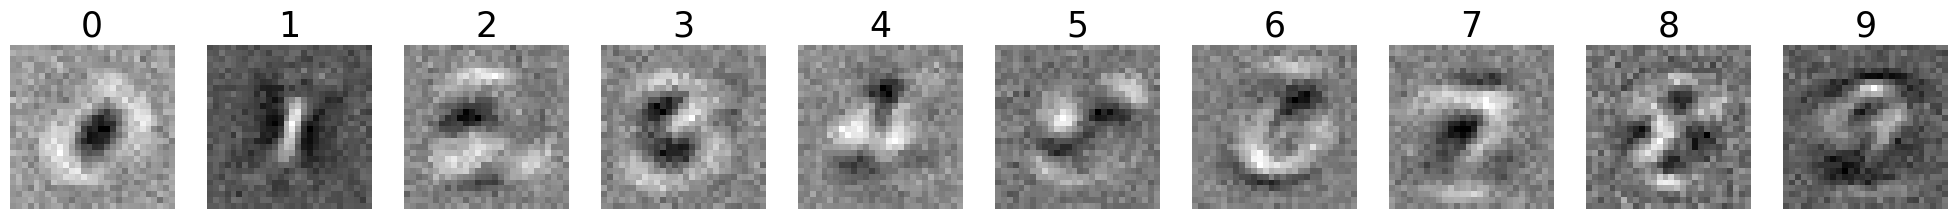

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Display templates
plt.rcParams["figure.figsize"] = (25, 10)

W = np.loadtxt("lc_mnist_weights.txt")  # load weigths, shape (785, 10)
print(f"Shape with bias: {W.shape}")

# Remove bias
W = W[:-1, :]
print(f"Shape without bias: {W.shape}")

# Normalize
w_min, w_max = np.min(W), np.max(W)
templates = 255 * (W - w_min) / (w_max - w_min)

# Display templates
labels_names = [str(i) for i in range(10)]
for i in range(10):
    plt.subplot(1, 10, i + 1)
    img = templates[:, i].reshape(28, 28).astype(int)
    plt.imshow(img, cmap="gray")
    plt.axis("off")
    plt.title(labels_names[i], size=25)

Визуально заметно, что шаблоны цифр в какой-то мере несут в себе образы соответствующих цифр.

Таким же образом мы можем отобразить шаблоны линейного классификатора для датасета CIFAR-10 с надеждой, что мы так же сможем увидеть в шаблонах обобщенную "лошадь" или "кота":

<center><img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.3/L05/out/linear_classifier_cifar.png" width="450"></center>

Shape with bias: (3073, 10)
Shape without bias: (3072, 10)


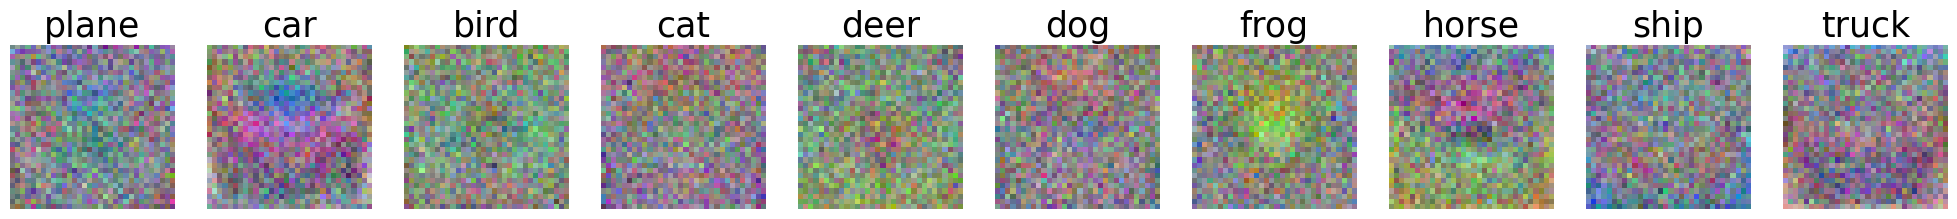

In [3]:
# Display templates
plt.rcParams["figure.figsize"] = (25, 10)

W = np.loadtxt("lc_cifar10_weights.txt")  # load weigths, shape (3073, 10)
print(f"Shape with bias: {W.shape}")

# Remove bias
W = W[:-1, :]
print(f"Shape without bias: {W.shape}")

# Normalize
w_min, w_max = np.min(W), np.max(W)
templates = 255 * (W - w_min) / (w_max - w_min)

# Display templates
labels_names = [
    "plane",
    "car",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck",
]
for i in range(10):
    plt.subplot(1, 10, i + 1)
    img = templates[:, i].reshape(3, 32, 32).transpose(1, 2, 0).astype(int)
    plt.imshow(img)
    plt.axis("off")
    plt.title(labels_names[i], size=25)

Для датасета CIFAR-10 уже гораздо сложнее визуально проследить схожесть выученных шаблонов с входными изображениями.

Качественное отличие датасетов MNIST и CIFAR-10 заключается в том, что в CIFAR-10 выше **внутриклассовая вариативность**. Это значит, что изображения внутри каждого класса могут достаточно сильно различаться. Лошадь может стоять головой направо или налево, на фоне леса или на фоне поля, и т. д. В датасете MNIST внутриклассовая вариативность гораздо ниже: все цифры отцентрированы и изображения одной и той же цифры в среднем гораздо больше похожи друг на друга.

Ограничение линейного классификатора состоит в том, что для каждого класса существует только один шаблон. Шаблон каждого класса будет пытаться вобрать в себя информацию обо всех объектах класса сразу (например, на получившихся шаблонах для CIFAR-10 у лошади две головы, машина красная и т. д.). Сильная внутриклассовая вариативность будет мешать линейному классификатору запоминать разные варианты объектов одного класса, и это ограничивает точность модели.

## Проблемы классификации более сложных объектов

Человек узнает на изображении кошку или любой другой объект, руководствуясь целостным представлением о данном объекте на изображении. Такое целостное интуитивное представление об объектах для компьютера напрямую недоступно. С точки зрения компьютера, изображение представляет собой не более чем таблицу из чисел, кодирующих цвета всех его пикселей. Небольшое цветное изображение (с тремя  цветовыми каналами: красным, зеленым и синим) в разрешении $32 \times 32$ для компьютера представлено просто упорядоченным набором из $32 \times 32 \times 3 = 3072 $ целых чисел.

Легко себе представить ситуацию, в которой изображения одного и того же объекта будут значительно отличаться. Так, например, один и тот же кот может быть представлен на фотографии в различных позах, фотографии могут отличаться условиями освещения, яркостью или контрастностью. Кроме того, на одной из фотографий может быть изображен только фрагмент объекта — скажем, только хвост. Все эти факторы не являются преградой для распознавания человеком, и мы хотим потребовать того же и для реализованных на компьютере алгоритмов классификации.


Вот лишь малая часть параметров, которые будут влиять на точность распознавания классификатора:


<center><img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.3/L05/out/problem_classification_difficult_object.png" width="700"></center>

Все описанные выше сложности обобщенно можно назвать **внутриклассовой вариативностью**: мы можем приписывать к одному классу объекты, которые допускают широкий спектр определения. Так, например, мы обобщаем классом "кошка" кошек различных пород, размеров и возрастов. "Хороший" алгоритм классификации должен быть устойчив к внутриклассовой вариативности и верно распознавать все возможные варианты объектов.

Кроме описанных сложностей, линейные модели классификации способны качественно работать в условиях линейной разделимости классов, что бывает далеко не всегда. Классическим примером задачи, в которой данные линейно неразделимы, является задача моделирования логической функции XOR ("исключающее ИЛИ"). Линейный классификатор может построить только одну разделяющую прямую в пространстве признаков и не может справиться с этой, казалось бы, простой задачей.

Подробнее о проблеме XOR: [[blog] ✏️ Demystifying the XOR problem](https://dev.to/jbahire/demystifying-the-xor-problem-1blk).

<center><img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.3/L05/out/xor_problem.png" width="1000"></center>

# Многослойные нейронные сети

Одна из идей для решения проблемы внутриклассовой вариативности — модифицировать модель таким образом, чтобы у нее внутри было не по одному шаблону на каждый класс, а по несколько (скажем, 100 шаблонов вместо 10 при десяти классах). Тогда бы модель имела возможность запоминать разные объекты одного класса и далее использовать эти промежуточные шаблоны для разбиения объектов на классы.

<center><img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.3/L05/out/modified_model.png"  width="600"></center>

Реализуем эту модель на основе линейного классификатора из лекции №2.

Применяем к выходам классификатора еще один классификатор. Будет ли данная модель работать лучше?

In [4]:
import numpy as np


x = np.random.rand(3072)  # random image
W1 = np.random.randn(3072, 100) * 0.0001  # without bias
W2 = np.random.randn(100, 10) * 0.0001  # without bias

scores1 = np.matmul(x, W1)  # matrix multiplication, equivalent x @ W1
scores2 = np.matmul(scores1, W2)  # matrix multiplication, of the next classifier

print(f"First classifier shape: {scores1.shape}")
print(f"Second classifier shape: {scores2.shape}")

First classifier shape: (100,)
Second classifier shape: (10,)


Нетрудно заметить, что последовательное применение двух классификаторов к входным данным эквивалентно применению одного классификатора с матрицей весов, равной произведению двух матриц весов классификаторов, примененных последовательно.

$$\large \text{scores}_1 = x \cdot W_1 $$

$$\large \text{scores}_2 = \text{scores}_1 \cdot W_2 = x  \cdot W_1 \cdot W_2 $$

$$\large W = W_1 \cdot W_2 $$

$$\large \text{scores}_2 = x \cdot W $$

Для того, чтобы последовательно примененные классификаторы не вырождались в один, необходимо применить нелинейность к их выходам. Например, пропустить результат применения первой матрицы весов через сигмоиду:

$$\large \sigma(s)=\frac{1}{1+e^{-s}}$$

<center><img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.3/L05/out/sigmoid_function.png" width="500"></center>

In [5]:
def sigmoid(s):
    return 1 / (1 + np.exp(-s))


# Define vectorized sigmoid to implement with ndarray element-wise
sigmoid_np = np.vectorize(sigmoid)

scores1 = np.matmul(x, W1)
activations = sigmoid_np(scores1)  # values after non-linear function
scores2 = np.matmul(activations, W2)

print(f"First classifier shape: {scores1.shape}")
print(f"Activations shape: {scores1.shape}")
print(f"Second classifier shape: {scores2.shape}")

First classifier shape: (100,)
Activations shape: (100,)
Second classifier shape: (10,)


Теперь вычисления выглядят так:

$$\large \text{scores}_1 = x \cdot W_1 $$

$$\large \text{activations} = σ\left(\text{scores}_1\right) $$

$$\large \text{scores}_2 = \text{activations} \cdot W_2 =σ\left(x \cdot W_1\right) \cdot W_2$$

Такая нелинейная функция, примененная к результату линейного преобразования, называется **функцией активации**. И мы уже пользовались подобной, когда разбирали Cross-Entropy Loss (Softmax).

Приведем код в порядок:

In [6]:
class NeuralNet:
    def __init__(self):
        self.W1 = np.random.randn(3072, 100) * 0.0001
        self.W2 = np.random.randn(100, 10) * 0.0001

    def predict(self, x):
        scores1 = np.matmul(x, W1)  # Linear
        activations = sigmoid_np(scores1)  # activation Sigmoid
        scores2 = np.matmul(activations, W2)  # Linear

        return scores2


x = np.random.rand(3072)  # image
model = NeuralNet()
scores = model.predict(x)
print(f"Model output shape: {scores.shape}")

Model output shape: (10,)


Ядром вычислений по-прежнему является скалярное произведение входов с весовыми коэффициентами.

Таким образом вводится модель искусственного нейрона — базового элемента искусственной нейронной сети. Выходом нейрона является результат применения функции активации к взвешенной сумме входных сигналов (в общем случае с учетом смещения — "bias").


<center><img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.3/L05/out/neurons_output.png" width="650"></center>

Нейроны в нейронных сетях объединяют в слои и соединяют между слоями по принципу "каждый с каждым". Так получаются **многослойные полносвязные нейронные сети** (fully-connected networks). Синонимичным названием является **многослойный персептрон**.

Пример многослойного персептрона с двумя скрытыми слоями:

<center><img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.3/L05/out/nn_fully_connected.png"  width="500"></center>

Как добавление в модель скрытых слоев с нелинейностями позволяет решать линейно неразделимые задачи (вроде XOR или более сложные) можно пронаблюдать [в интерактивном тренажере от TensorFlow 🎮[demo]](http://playground.tensorflow.org/#activation=linear&batchSize=10&dataset=xor&regDataset=reg-plane&learningRate=0.1&regularizationRate=0&noise=0&networkShape=&seed=0.62952&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false).

##  Веса и смещения

Веса и смещения являются настраиваемыми параметрами в нейронной сети. Они настраиваются в процессе обучения, поэтому их также называют **обучаемыми параметрами**. Рассмотрим, как различные значения обучаемых параметров влияют на работу одного нейрона. Это поможет нам получить интуицию, как добавление в модель скрытых слоев с нелинейностями наделяет её большей выразительной способностью.

<center><img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.3/L05/out/why_add_bias_example.png" width="500"></center>

Рассмотрим простой пример. На вход нейрона подаётся входное значение $x$, умноженное на вес $w$. После применения сигмоидальной функции активации, в зависимости от веса, при всевозможных значениях входа мы можем получить следующие графики при $w$, равном $0.5$, $1$ и $2$:

<center><img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.3/L05/out/sigmoid_with_different_weights.png" width="700"></center>

Можно заметить, что значение веса меняет **крутизну** итоговой сигмоидальной функции.

Но что, если требуется, чтобы при $x=5$ нейрон выдавал $0$? Изменением крутизны сигмоиды этого не добиться. Требуется дополнительный параметр — смещение.


**Смещение** (англ. bias) — это дополнительный коэффициент, прибавляющийся к взвешенной сумме входов. Наличие смещения позволяет сдвинуть функцию активации влево или вправо.



<center><img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.3/L05/out/add_bias_example.png" width="500"></center>

Тогда при смещениях, равных $5$, $0$ и $-5$, мы можем получить сдвинутые функции активации, что способствует лучшему обучению нейронной сети:

<center><img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.3/L05/out/sigmoid_with_different_biases.png" width="700"></center>

## Нейронная сеть как универсальный аппроксиматор

Известным теоретическим результатом в области нейронных сетей является **теорема об универсальной аппроксимации**, или [теорема Цыбенко 📚[wiki]](https://ru.wikipedia.org/wiki/Теорема_Цыбенко). Она гласит следующее:

> Искусственная нейронная сеть прямого распространения с одним скрытым слоем и сигмоидальными функциями активации может поточечно аппроксимировать любую непрерывную функцию многих переменных с любой наперед заданной точностью.

Условиями универсальной аппроксимации являются достаточное количество нейронов скрытого слоя и правильный подбор параметров (весовых коэффициентов и смещений) нейросети.

Данный результат неконструктивен, поскольку он не говорит, *сколько необходимо скрытых нейронов* для аппроксимации той или иной функции, а также *как следует подбирать веса и смещения*. Однако он дает основания полагать, что для аппроксимации любой функции с помощью нейросети **достаточно** одного скрытого слоя с нелинейностями в виде сигмоиды.

Для того, чтобы увидеть, как из суммы сигмоидальных функций можно построить произвольную функцию, рассмотрим следующую иллюстрацию:

In [7]:
from IPython.display import HTML
from base64 import b64encode

!wget -qN https://edunet.kea.su/repo/EduNet-content/dev-2.3/L05/out/universal_approximation.mp4

mp4 = open("universal_approximation.mp4", "rb").read()
data_url = f"data:video/mp4;base64,{b64encode(mp4).decode()}"
HTML(f"<video width=1000  controls><source src={data_url} type='video/mp4'></video>")

Пусть мы имеем набор точек $(x, y)$ и предполагаем, что существует некоторая закономерность, связывающая $x$ и $y$:

$$\large y=f(x)$$

Мы можем подобрать и применить к $x$ такой весовой коэффициент $w_{1}$ и такое смещение $b_1$, что взятая от них сигмоида пройдет через часть наших точек или достаточно близко к ним:

$$\large \sigma_1=\sigma(w_{1}x+b_1)$$

После этого мы можем подобрать и применить к $x$ такие $w_{2}$ и $b_2$, что взятая от них сигмоида в сумме с $\sigma_1$ пройдет еще через часть точек или достаточно близко к ним:

$$\large \sigma_2=\sigma(w_{2}x+b_2)$$

Мы можем продолжать добавлять сигмоиды и подбирать их параметры до тех пор, пока их сумма не станет достаточно точно приближать закономерность $f(x)$, выраженную в данных:

$$\large \sigma_1+\sigma_2+...+\sigma_n \approx f(x)$$

В случае нашего примера $n=4$.

Этот пример не говорит, *как подбирать веса и смещения*, но показывает, что принципиально нам достаточно лишь одного скрытого слоя и нелинейностей в виде сигмоиды, чтобы в сумме они приближали произвольную закономерность, выраженную в данных. Это и утверждает теорема об универсальной аппроксимации.

Для получения дополнительной интуиции об универсальной аппроксимации рекомендуем обратиться к [A visual proof that neural nets can compute any function 📚[book]](http://neuralnetworksanddeeplearning.com/chap4.html).

# Обучение нейронной сети

На практике обучение нейронных сетей (подбор значений весов) производится при помощи **метода градиентного спуска**.

Обучение заключается в **минимизации функции потерь по обучаемым параметрам нейронной сети** — весам и смещениям.

Для минимизации функции потерь методом градиентного спуска **необходимо уметь вычислять градиент функции потерь по всем обучаемым параметрам модели**.

##  Прямое и обратное распространение

Процесс расчета градиента функции потерь по обучаемым параметрам состоит из двух этапов: **прямого и обратного распространения**.

<center><img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.3/L05/out/forward_pass.png" width="500"></center>

Во время **прямого распространения** (forward pass) производится расчет значений на выходе модели $y_{pred}$, которые передаются в функцию потерь $\text{Loss}$ для сравнения с целевыми значениями $y_{true}$.

$$\large y_{pred}=\text{model}\left(x, 𝐖\right)$$

$$\large L=\text{Loss}\left(y_{true}, y_{pred}\right)$$

Значение функции потерь зависит от целевых значений $y_{true}$, входных данных $x$ и параметров модели $𝐖$.

$$\large L=\text{Loss}\left(y_{true}, \text{model}\left(x, 𝐖\right)\right) = f\left(y_{true}, x, 𝐖\right)$$

А значит, если модель и функция потерь дифференцируемы, мы можем посчитать $\nabla_𝐖L$ — градиент функции потерь по обучаемым параметрам. Для этого нужен этап **обратного распространения** (backward pass).

<center><img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.3/L05/out/backward_pass.png" width="500"></center>

##  Метод обратного распространения ошибки

Для эффективного численного расчета градиента функции потерь по обучаемым параметрам модели применяется **метод обратного распространения ошибки (backpropagation)**. Благодаря данному методу становится практически возможным использование метода градиентного спуска для проведения процедуры обучения.

Метод обратного распространения ошибки использует структуру многослойной нейронной сети как сложной функции, применяя правило дифференцирования сложной функции для вычисления градиента от функции потерь по весам сети. Градиент от функции потерь вычисляется при движении по нейронной сети от её выходов в направлении входов. Именно такой порядок обхода вычислительного графа и обуславливает название метода.

Для более детального рассмотрения принципов работы и обучения нейронных сетей рекомендуем:

[[video] 📺 Плей-лист от 3Blue1Brown](https://youtube.com/playlist?list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi&si=O3gq6RoIxoNS6iJf) [[озвучка на русском](https://youtube.com/playlist?list=PLZjXXN70PH5itkSPe6LTS-yPyl5soOovc&si=ElKVi98Ui4m2nJKq)].

### Вычислительный граф

По существу, нейронная сеть является сложной функцией, работу которой можно представить как последовательное выполнение математических операций. Такое представление функций называется [вычислительным графом ✏️[blog]](https://qudata.com/ml/ru/ML_Comp_Graph.html).

<center><img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.3/L05/out/nn_fully_connected.png" width="500"></center>

Алгоритм обратного распространения ошибки позволяет находить градиенты для любого графа вычислений, если описываемая им функция дифференцируема.

В его основе лежит правило взятия производной сложной функции (chain rule):

Одна переменная:

$$\large y(x) = f(u(g(x))) $$

$$\large \frac{dy}{dx} = \frac{df}{du} \frac{du}{dg} \frac{dg}{dx}$$

Несколько переменных:

$$\large y(x) = f(u_1(x),u_2(x),...u_n(x))$$

$$\large \frac{dy}{dx} = \sum_{i=1}^{n} \frac{\partial f(u_1, u_2, ... u_n)}{\partial u_i} \frac{du_i}{dx}$$

$$\large \underbrace{\frac{d}{dx} f(\vec{\mathbf{u}}(x))}_{\text{Derivative of composition function}} = \overbrace{\nabla_{\vec{u}} f \cdot \vec{\mathbf{u}}'(x)}^{\text{Dot product of vectors}}$$

####  Пошаговый разбор метода обратного распространения

Пусть в каком-то узле графа производится вычисление

$$\large z = f(x, y),$$

и далее результат вычисления $\large z$ используется для вычисления функции $\large L(z)=L(f(x, y))$.

Тогда правило вычисления производных $\dfrac{\partial L}{\partial x}$ и $\dfrac{\partial L}{\partial y}$ можно представить следующим образом:

<center><img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.3/L05/out/rule_for_taking_gradients.png"  width="500"></center>

Рассмотрим следующую функцию:

$$\Large f(w,x)=\frac{1}{1+e^{-(w_0x_0+w_1x_1+w_2)}}$$

Представим ее в виде вычислительного графа, состоящего из элементарных операций, от которых просто берутся производные:

<center><img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.3/L05/out/graph_of_calculation_gradient.png"  width="700"></center>

На примере данной функции рассмотрим алгоритм обратного распространения ошибки и найдём величину её градиента по параметрам $\large w$.
Нам потребуется вычислить частные производные $\dfrac{\partial f}{\partial w_0}, \dfrac{\partial f}{\partial w_1}, \dfrac{\partial f}{dw_2}, \dfrac{\partial f}{\partial x_0}$ и $\dfrac{\partial f}{\partial x_1}$.

Пусть "веса" $w$ инициализированы значениями $w_0=2,\;w_1=-3,\;w_2=-3$, а "входные признаки" $x$ принимают значения $x_0=-1,\;x_1=-2$.

Делая прямой проход через граф вычислений для данной функции, получаем её значение для заданных $w$ и $x$ равным $f=0.73$:

<center><img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.3/L05/out/forward_pass_example.png" width="800"></center>

Далее, в соответствии с алгоритмом обратного распространения ошибки, рассчитаем частные производные, пройдясь последовательно по графу вычислений, постепенно накапливая искомое значение для градиента функции.

Для начала зададим $\dfrac{df}{df}=1$.

Начинаем обратный проход по графу вычислений. Первая вершина содержит функцию $f(x)=\dfrac{1}{x}$, производная которой равна $\dfrac{df}{dx}=-\dfrac{1}{x^2}$

<center><img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.3/L05/out/compute_gradient_1_step.png" width="800"></center>

$$\large f(x)=\frac1x \quad \longrightarrow \quad \frac{df}{dx} = -\frac{1}{x^2}$$

В следующем узле находится функция $f(x)=1+x$. Производная от выражения в данном узле равняется $\dfrac{df}{dx}=1$:

<center><img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.3/L05/out/compute_gradient_2_step.png" width="800"></center>

$$\large f(x)=c+x \quad \longrightarrow \quad \frac{df}{dx} = 1$$

Третья вершина содержит экспоненту $f(x)=e^x$. Её производная также является экспонентой $\dfrac{df}{dx}=e^x$:

<center><img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.3/L05/out/compute_gradient_3_step.png" width="800"></center>

$$\large f(x)=e^x \quad \longrightarrow \quad \frac{df}{dx} = e^x$$

Следующая вершина, четвертая, содержит умножение на константу $f(x)=ax$. Производная равна $\dfrac{df}{dx}=a$ (в данном случае $a=-1$):

<center><img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.3/L05/out/compute_gradient_4_step.png" width="800"></center>

$$\large f(x)=ax \quad \longrightarrow \quad \frac{df}{dx} = a$$

Двигаясь по графу вычислений, мы дошли до узла суммирования, который имеет два входа. Относительно каждого из входов локальный градиент в вершине суммирования будет равен $1$:
$$\large f(x,y)=x+y \quad \Rightarrow \quad \frac{\partial f}{\partial x}=1  \quad \quad \frac{\partial f}{\partial y}=1$$
Так как умножение на единицу не изменит значения входного градиента, всем входам узла суммирования мы можем приписать точно такое же значение входного градиента ($0.2$), что мы имели и для самого узла суммирования. Будем действовать аналогично и со всеми остальными узлами суммирования, которые встретятся нам в вычислительном графе.

<center><img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.3/L05/out/compute_gradient_5_step.png" width="800"></center>

Двигаясь далее к началу графа вычислений, мы подходим к вершинам умножения. Для такой вершины локальный градиент по отношению к какому-либо из входов будет равен значению оставшегося входа. Остается умножить локальный градиент на входящий.

$$\large f(w,x)=wx \quad \Rightarrow \quad \frac{\partial f}{\partial w}=x  \quad \quad \frac{\partial f}{\partial x}=w$$

Точно так же мы можем поступить и с оставшейся второй вершиной умножения, которая привязана к $w_1$ и $x_1$:

<center><img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.3/L05/out/compute_gradient_6_step.png" width="800"></center>

Так, двигаясь по графу вычислений в обратном направлении от выхода функции к входным аргументам, мы последовательно для каждого узла умножаем локальный градиент на входящий градиент, используя цепное правило дифференцирования сложной функции. В описанном примере мы полностью разбили граф вычислений на отдельные элементарные узлы. Разбиение вычислительного графа на элементарные узлы вовсе не обязательно — мы можем сгруппировать несколько вершин вместе, если они образуют дифференцируемую функцию, от которой "удобно" брать производную, и рассматривать их совместно.

В нашем примере мы можем заметить, что вычислительный граф можно свести к двум операциям: получению выражения $w_0x_0+w_1x_1+w_2$ и последующему вычислению от него сигмоидальной функции.

Функция сигмоиды:

$$\large \displaystyle \sigma(x) = \frac{1}{1+e^{-x}}.$$

Важно отметить, что сигмоида обладает важным свойством: её производная может быть выражена через саму сигмоидальную функцию:

$$\large \frac{d}{dx}\sigma(x) = \frac{d}{dx}(1+e^{-x})^{-1} = \frac{e^{-x}}{(1+e^{-x})^{2}} = \frac{1}{1+e^{-x}} \cdot \frac{1+e^{-x}-1}{1+e^{-x}} = \sigma(x)\cdot(1-\sigma(x))$$

<center><img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.3/L05/out/compute_gradient_join_vertices_sigmoid_example.png" width="800"></center>

В коде без использования библиотек подсчёт градиентов можно записать как:

<center><img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.3/L05/out/calculating_gradients_in_code.png" width="800"></center>

#### Реализация в PyTorch

Практически вся наша работа c нейронными сетями будет осуществляться с помощью [PyTorch 🛠️[doc]](https://pytorch.org/), поэтому необходимо познакомиться с основными концептами, принципами и функциями этой библиотеки.

Лучший друг в этом, конечно же, [документация 🛠️[doc]](https://pytorch.org/docs/stable/index.html). Здесь же мы разберем только основные сущности и методы.

##### Основная сущность — torch.Tensor

Класс `torch.Tensor` [🛠️[doc]](https://pytorch.org/docs/stable/tensors.html#torch.Tensor) предоставляет функциональность работы с многомерными массивами.

Создание "пустого" тензора:

In [8]:
import torch

a = torch.Tensor()

Функция создания тензора из списка:

In [9]:
a = torch.tensor([1.1, 2.2, 3.2])
a.dtype

torch.float32

Явное указание типа данных:

In [10]:
a = torch.tensor([1.1, 2.2, 3.2], dtype=torch.float64)
a.dtype

torch.float64

Создание двумерного тензора, заполненного единицами (для нулей `zeros`):

In [11]:
a = torch.ones(size=(3, 2))
a.size()

torch.Size([3, 2])

Создание двумерного тензора, заполненного указанным значением:

In [12]:
a = torch.full(size=(3, 2), fill_value=3.74)
a

tensor([[3.7400, 3.7400],
        [3.7400, 3.7400],
        [3.7400, 3.7400]])

Транспонирование (изменение порядка осей):

In [13]:
a = a.T
a

tensor([[3.7400, 3.7400, 3.7400],
        [3.7400, 3.7400, 3.7400]])

В библиотеке реализовано большое количество математических функций:

In [14]:
c = torch.exp(a)
print("Exponents tensor:\n", c)

c += 1
print("\nAdd 1 to tensor:\n", c)

Exponents tensor:
 tensor([[42.0980, 42.0980, 42.0980],
        [42.0980, 42.0980, 42.0980]])

Add 1 to tensor:
 tensor([[43.0980, 43.0980, 43.0980],
        [43.0980, 43.0980, 43.0980]])


Почти всё, что есть в NumPy, есть в PyTorch. Например, суммирование значений тензора с помощью `.sum()`:

In [15]:
c.sum()

tensor(258.5880)

Перестановка, удаление и добавление пространственных измерений:

In [16]:
a = torch.zeros((2, 5, 1, 8))
print("Original tensor size:\n", a.size())

a = a.permute(dims=(2, 0, 3, 1))  # permute dimensions
print("After permute tensor size:\n", a.size())

a = a.squeeze()  # delete dimension
print("After squeeze tensor size:\n", a.size())

a = a.unsqueeze(dim=0)  # add dimension
print("After unsqueeze tensor size:\n", a.size())

Original tensor size:
 torch.Size([2, 5, 1, 8])
After permute tensor size:
 torch.Size([1, 2, 8, 5])
After squeeze tensor size:
 torch.Size([2, 8, 5])
After unsqueeze tensor size:
 torch.Size([1, 2, 8, 5])


Преобразование `torch.Tensor` в `np.ndarray`:

In [17]:
a.numpy()

array([[[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]]], dtype=float32)

PyTorch позволяет тензору быть представлением (view) существующего тензора. Тензор представления использует те же данные, что и его базовый тензор. Поддержка `view` позволяет избежать явного копирования данных, что позволяет экономить память.

In [18]:
a = torch.rand(2, 8)
print("Original tensor:\n", a)

b = a.view(4, 4)
print("\nTensor after view:\n", b)

print("\nTensor b uses the same memory space as tensor a:")
id(a[0, 0]) == id(b[0, 0])

Original tensor:
 tensor([[0.4099, 0.8517, 0.7903, 0.6938, 0.6434, 0.7698, 0.0804, 0.9290],
        [0.0429, 0.9906, 0.3219, 0.8402, 0.4895, 0.7716, 0.8961, 0.3328]])

Tensor after view:
 tensor([[0.4099, 0.8517, 0.7903, 0.6938],
        [0.6434, 0.7698, 0.0804, 0.9290],
        [0.0429, 0.9906, 0.3219, 0.8402],
        [0.4895, 0.7716, 0.8961, 0.3328]])

Tensor b uses the same memory space as tensor a:


True

Размещение тензора на GPU:

In [19]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Cuda available: {torch.cuda.is_available()} \n")

a = a.to(device)  # moving tensor to gpu
b = torch.full_like(a, 2).to(device)
c = a * b  # compute on gpu (more fast with parallel computing)
c

Cuda available: True 



tensor([[0.8198, 1.7033, 1.5806, 1.3876, 1.2868, 1.5396, 0.1609, 1.8581],
        [0.0857, 1.9813, 0.6438, 1.6803, 0.9790, 1.5432, 1.7921, 0.6657]],
       device='cuda:0')

##### Автоматическое вычисление градиента

PyTorch умеет запоминать последовательность операций с тензорами и вычислять градиент.

Вспомним функцию из примера выше

$$\Large f(w,x)=\sigma(w_0x_0+w_1x_1+w_2)$$

И построим ее вычислительный граф при $x_0=-1, x_1=-2, w_0=2,\;w_1=-3,\;w_2=-3$.

In [20]:
# x from above example
x0 = torch.tensor(-1.0, requires_grad=True)
x1 = torch.tensor(-2.0, requires_grad=True)

# w from above example
w0 = torch.tensor(2.0, requires_grad=True)
w1 = torch.tensor(-3.0, requires_grad=True)
w2 = torch.tensor(-3.0, requires_grad=True)

# forward pass to compute f
s = x0 * w0 + x1 * w1 + w2
f = torch.sigmoid(s)

print(f"f(x, W) = {f:.2f}")

f(x, W) = 0.73


При создании тензоров мы указали параметр `requires_grad=True`. Установка этого параметра указывает PyTorch на то, что необходимо отслеживать операции, в которых участвует данный тезор, для построения вычислительного графа и последующего вычисления градиента.

Можно визуализировать получившийся вычислительный граф с помощью библиотеки torchviz.

In [21]:
!pip install -qU torchviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 121.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 92.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 56.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 53.5 MB/s eta 0:00:00


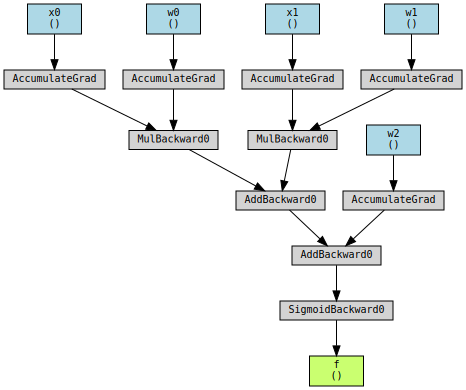

In [22]:
from torchviz import make_dot

make_dot(f, params={"x0": x0, "x1": x1, "w0": w0, "w1": w1, "w2": w2, "f": f})

Для того, чтобы рассчитать градиент функции по всем параметрам, надо вызвать метод `backward`:

In [23]:
print("gradient is None before backward")
print(f"w0.grad = {w0.grad}")
print(f"w1.grad = {w1.grad}")
print(f"w2.grad = {w2.grad}")

# backward pass to compute gradient df/dW
f.backward()

print("\ngradient computed after backward")
print(f"w0.grad = {w0.grad}")
print(f"w1.grad = {w1.grad}")
print(f"w2.grad = {w2.grad}")

gradient is None before backward
w0.grad = None
w1.grad = None
w2.grad = None

gradient computed after backward
w0.grad = -0.1966119259595871
w1.grad = -0.3932238519191742
w2.grad = 0.1966119259595871


Получили такие же значения частных производных $\dfrac{\partial f}{\partial w_i}$, как и при вычислении вручную (на иллюстрации градиент расчитан с точностью до двух знаков после запятой, в коде выше получены более точные значения).

<center><img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.3/L05/out/autograd_example.png" width="700"></center>

Все те же вычисления, что и несколькими ячейками выше, можно записать короче и произвести за счет скалярного произведения тензора признаков $x$ и тензора весов $w$:

In [24]:
x = torch.tensor([-1.0, -2.0])  # x from above example

x = torch.cat([x, torch.tensor([1.0])])  # concatenate x with 1. for bias trick

W = torch.tensor([2.0, -3.0, -3.0], requires_grad=True)  # w from above example

print(f"W.grad = {W.grad} (before forward and backward pass grad is 'None')")

# forward pass to compute f
s = x.matmul(W)
f = torch.sigmoid(s)
print(f"f(x, W) = {f:.2f}")

# backward pass to compute gradient df/dW
f.backward()
print(f"W.grad = {W.grad}")

W.grad = None (before forward and backward pass grad is 'None')
f(x, W) = 0.73
W.grad = tensor([-0.1966, -0.3932,  0.1966])


Мы не требовали возможности расчета градиента по аргументу `x` (не указали `requires_grad=True`), поэтому после вызова `f.backward()` градиент по нему не рассчитается:

In [25]:
print(f"x.grad = {x.grad}")

x.grad = None


Отсоединение тензора от графа вычислений производится с помощью `.detach()` (используется, если нужно производить какие-либо дальнейшие операции с тензором, но чтобы они не становились частью вычислительного графа):

In [26]:
f_detached = f.detach()

print(f"f_detached = {f_detached:.2f}")
print(f"f_detached type: {type(f_detached)}")

f_detached = 0.73
f_detached type: <class 'torch.Tensor'>


Также от тензора, содержащего скаляр, можно получить его величину с помощью `.item()`:

In [27]:
value = f_detached.item()

print(f"value = {value:.2f}")
print(f"value type: {type(value)}")

value = 0.73
value type: <class 'float'>


###  Обратное распространение в PyTorch


Рассмотрим алгоритм обратного распространения на примере вычисления квадрата ошибки для линейной регрессии (для простоты не будем рассматривать смещение):

$$\large y=w\cdot x, \quad при \;x=[1,2,3,4],\;y=[2,4,6,8],\;w=1$$

В данном примере видно, что предсказанный моделью $\hat{y}=[1,2,3,4]$ не совпадает с истинными значениями $y$, и, соответственно, квадратичная ошибка для такого примера будет:

$$\large \text{MSE}=\frac{1}{4}\sum_{i=1}^4E_i^2=\frac{1}{4}\sum_{i=1}^4(\hat{y}_i-y_i)^2=\frac{1+4+9+16}{4}=7.5$$

Градиент функции потерь по весу $w$ вычисляется следующим образом, в соответствии с цепным правилом:

$$\large \frac{\partial \text{MSE}}{\partial w} = \frac{\partial \text{MSE}}{\partial E}\cdot \frac{\partial E}{\partial \hat{y}}\cdot \frac{\partial \hat{y}}{\partial w}$$

Рассчитаем его с использованием PyTorch:

In [28]:
x_train = torch.tensor([1, 2, 3, 4], dtype=torch.float32)
y_train = torch.tensor([2, 4, 6, 8], dtype=torch.float32)

# This is the parameter we want to optimize -> requires_grad=True
W = torch.tensor(1.0, dtype=torch.float32, requires_grad=True)
print(f"W.grad = {W.grad} (before forward pass must be 'None')\n")

# forward pass to compute MSE
y_pred = W * x_train
E = y_pred - y_train
SE = E**2
MSE = SE.mean()
print(f"MSE = {MSE}")

# backward pass to compute gradient dMSE/dw
MSE.backward()
print(f"W.grad = {W.grad}")

W.grad = None (before forward pass must be 'None')

MSE = 7.5
W.grad = -15.0


В данном примере мы произвели следующие расчеты:

$\dfrac{\partial \text{MSE}}{\partial E}=\dfrac{1}{4}\dfrac{\partial E^2}{\partial E}=\dfrac{1}{4}\cdot2\cdot E=\dfrac{1}{2}*[-1, -2, -3, -4]=[-0.5, -1, -1.5, -2]\quad $ $*$ — поэлементное умножение

$\dfrac{\partial E}{\partial \hat{y}}=\dfrac{\partial (\hat{y}-y)}{\partial \hat{y}}=1$

$\dfrac{\partial \hat{y}}{\partial w}=\dfrac{\partial wx}{\partial w}=x=[1, 2, 3, 4]$

$\dfrac{\partial \text{MSE}}{\partial w} = \dfrac{\partial \text{MSE}}{\partial E}\cdot \dfrac{\partial E}{\partial \hat{y}}\cdot \dfrac{\partial \hat{y}}{\partial w}=\sum[-0.5, -1, -1.5, -2]*[1, 2, 3, 4]=-0.5-2-4.5-8=-15$

`MSE.backward()` автоматически вычисляет градиент $\dfrac{\partial \text{MSE}}{\partial w}$ при указании `requires_grad=True`.
Результаты вычислений будут храниться в `W.grad`. Для всех промежуточных переменных градиенты не сохраняются, поэтому попытка обратиться, например, к `E.grad` выдаст ошибку.

Также после однократного обратного прохода в целях экономии памяти граф, используемый для вычисления градиента, будет удаляться, и следующий запуск `MSE.backward()` будет выдавать ошибку:

```python
MSE.backward() # Error on second backward call
```



Чтобы сохранить вычислительный граф, нужно вызвать `backward()` с параметром `retain_graph=True`. В таком случае значения градиентов, полученные на следующих итерациях обратного распространения ошибки, будут складываться с текущими значениями градиентов.

Градиенты переменных, для которых был указан `requires_grad=True`, сохраняются автоматически. Чтобы избежать их накопления при многократном итерировании алгоритма обратного распространения, нужно обнулять градиент на каждом шаге с помощью метода `Тensor.grad.zero_()`.

In [29]:
x_train = torch.tensor([1, 2, 3, 4], dtype=torch.float32)
y_train = torch.tensor([2, 4, 6, 8], dtype=torch.float32)

# This is the parameter we want to optimize -> requires_grad=True
W = torch.tensor(1.0, dtype=torch.float32, requires_grad=True)

# forward pass to compute MSE
y_pred = W * x_train
MSE = ((y_pred - y_train) ** 2).mean()

print("Backward 1:")
MSE.backward(retain_graph=True)
print(f"dMSE/dW = {W.grad} \n")

print("Without forward, backward 2. Gradient is accumulating:")
MSE.backward(retain_graph=True)
# Gradients are accumulated
print(f"dMSE/dW = {W.grad}\n")

print("Backward 3, but firstly nullify gradients:")
W.grad.zero_()  # Nullify gradients for W for the next iteration
MSE.backward(retain_graph=True)
print(f"dMSE/dW = {W.grad}")

Backward 1:
dMSE/dW = -15.0 

Without forward, backward 2. Gradient is accumulating:
dMSE/dW = -30.0

Backward 3, but firstly nullify gradients:
dMSE/dW = -15.0


Итак, мы умеем вычислять градиент $\displaystyle \frac{\partial \text{MSE}}{\partial w}$ для нашего примера. Теперь давайте с его помощью оптимизируем веса, используя алгоритм обратного распространения ошибки:

In [30]:
x_train = torch.tensor([1, 2, 3, 4], dtype=torch.float32)
y_train = torch.tensor([2, 4, 6, 8], dtype=torch.float32)

W = torch.tensor(1.0, dtype=torch.float32, requires_grad=True)


# Define model output
def forward(x_train):
    return W * x_train


# Compute MSE loss
def criterion(y_pred, y_train):
    return ((y_pred - y_train) ** 2).mean()


print(f"Prediction before training: f(x) = {forward(x_train)}")
print(f"True values: y = {y_train}\n")

# Training
learning_rate = 0.005
num_epochs = 102

for epoch in range(num_epochs):
    # Propagate forward
    y_pred = forward(x_train)

    # Compute MSE loss
    MSE = criterion(y_pred, y_train)

    # Propagate backward, compute gradients
    MSE.backward()

    # Update weights
    with torch.no_grad():  #  We don't want this step to be the part of the computational graph
        W -= learning_rate * W.grad

    # Nullify gradients after updating to avoid their accumulation
    W.grad.zero_()

    if epoch % 10 == 1:
        print(f"epoch {epoch}: w = {W.item():.3f}, loss = {MSE.item():.8f}")

print(f"\nPrediction after training: f(x) = {forward(x_train)}")
print(f"True values: y = {y_train}")

Prediction before training: f(x) = tensor([1., 2., 3., 4.], grad_fn=<MulBackward0>)
True values: y = tensor([2., 4., 6., 8.])

epoch 1: w = 1.144, loss = 6.41718674
epoch 11: w = 1.608, loss = 1.34952068
epoch 21: w = 1.820, loss = 0.28380114
epoch 31: w = 1.917, loss = 0.05968266
epoch 41: w = 1.962, loss = 0.01255111
epoch 51: w = 1.983, loss = 0.00263946
epoch 61: w = 1.992, loss = 0.00055505
epoch 71: w = 1.996, loss = 0.00011674
epoch 81: w = 1.998, loss = 0.00002455
epoch 91: w = 1.999, loss = 0.00000516
epoch 101: w = 2.000, loss = 0.00000109

Prediction after training: f(x) = tensor([1.9996, 3.9993, 5.9989, 7.9986], grad_fn=<MulBackward0>)
True values: y = tensor([2., 4., 6., 8.])


Видно, что наш подход позволяет оптимизировать вес $w$ регрессии из примера и таким образом добиться почти идеального предсказания нашей модели, однако в данном подходе дополнительно можно автоматизировать вычисление функции потерь и обновление параметров с учетом градиента, используя готовые функции потерь из `torch.nn` и оптимизаторы из `torch.optim`.

In [31]:
import torch.nn as nn


x_train = torch.tensor([1, 2, 3, 4], dtype=torch.float32)
y_train = torch.tensor([2, 4, 6, 8], dtype=torch.float32)

W = torch.tensor(1.0, dtype=torch.float32, requires_grad=True)


# Define model output
def forward(x_train):
    return W * x_train


print(f"Prediction before training: f(x) = {forward(x_train)}")
print(f"True values: y = {y_train}\n")

# Training
learning_rate = 0.005
num_epochs = 102

criterion = nn.MSELoss()
optimizer = torch.optim.SGD([W], lr=learning_rate)

for epoch in range(num_epochs):
    # Propagate forward
    y_pred = forward(x_train)

    # Compute MSE loss
    MSE = criterion(y_pred, y_train)

    # Propagate backward, compute gradients
    MSE.backward()

    # Update weights
    optimizer.step()

    # Nullify gradients after updating to avoid their accumulation
    optimizer.zero_grad()

    if epoch % 10 == 1:
        print(f"epoch {epoch}: w = {W.item():.3f}, loss = {MSE.item():.8f}")

print(f"\nPrediction after training: f(x) = {forward(x_train)}")
print(f"True values: y = {y_train}")

Prediction before training: f(x) = tensor([1., 2., 3., 4.], grad_fn=<MulBackward0>)
True values: y = tensor([2., 4., 6., 8.])

epoch 1: w = 1.144, loss = 6.41718674
epoch 11: w = 1.608, loss = 1.34951985
epoch 21: w = 1.820, loss = 0.28380090
epoch 31: w = 1.917, loss = 0.05968266
epoch 41: w = 1.962, loss = 0.01255111
epoch 51: w = 1.983, loss = 0.00263946
epoch 61: w = 1.992, loss = 0.00055505
epoch 71: w = 1.996, loss = 0.00011674
epoch 81: w = 1.998, loss = 0.00002455
epoch 91: w = 1.999, loss = 0.00000516
epoch 101: w = 2.000, loss = 0.00000109

Prediction after training: f(x) = tensor([1.9996, 3.9993, 5.9989, 7.9986], grad_fn=<MulBackward0>)
True values: y = tensor([2., 4., 6., 8.])


##  Функции потерь (loss functions)

Функция потерь измеряет точность нейронной сети, оценивая расхождение между предсказанными результатами и истинными значениями. Она принимает два аргумента:
- вектор истинных значений,
- вектор предсказанных значений.

Для успешного обучения с использованием градиентного спуска функция потерь должна быть дифференцируемой и ограниченной снизу.
Рассмотрим наиболее часто применяемые функции потерь и то, как устроены их реализации в PyTorch и как ими пользоваться.

[[doc] 🛠️ Функции потерь в PyTorch](https://pytorch.org/docs/stable/nn.html#loss-functions)

###  Mean Squared Error

Средняя квадратическая ошибка (MSE) — популярная функция потерь для задач регрессии, где модель предсказывает вещественные числа.

Для $i$-го объекта выборки, если выходной вектор состоит из $C$ компонент, средняя квадратическая ошибка между выходом модели $\hat{y}$ и целевым вектором $y$ будет равна

$$\large \text{MSE}_i\left(\hat{y},y\right)=\frac{1}{C} \sum_{k=1}^{C}{\left(\hat{y}_{ik}-y_{ik}\right)^2}$$



**Примечание, относящееся ко всем функциям потерь в PyTorch, которые будут рассмотрены ниже.**

При вычислении по всему набору данных (или по мини-батчу) из $N$ объектов ошибка на отдельных объектах может усредняться или суммироваться. За это отвечает параметр `reduction`, который принимает значения `"mean"` или `"sum"`, а также может принимать значение `"none"`, при котором агрегация производиться не будет, и тогда функция будет возвращать тензор значений размером $N$.

**По умолчанию в большинстве функций потерь в PyTorch `reduction="mean"`.**


[[doc] 🛠️ MSE Loss в PyTorch](https://pytorch.org/docs/stable/generated/torch.nn.MSELoss.html#torch.nn.MSELoss):
```python
torch.nn.MSELoss()
```

In [32]:
criterion = nn.MSELoss()

# Batch of 1 element and 3 components in output vector
model_output = torch.Tensor([0.5, -0.25, 0.75])
print(f"model_output: {model_output}")

target = torch.Tensor([1, 0.25, 0.25])
print(f"target: {target}")

loss_mse = criterion(model_output, target)
print(f"loss_mse: {loss_mse}")

model_output: tensor([ 0.5000, -0.2500,  0.7500])
target: tensor([1.0000, 0.2500, 0.2500])
loss_mse: 0.25


- **Преимущество:** MSE штрафует за большие ошибки в предсказаниях, так как ошибки возводятся в квадрат.

- **Недостаток:** MSE сильно акцентируется на выбросах, что может быть нежелательно для задач, где важнее высокая точность на большинстве примеров, а не устранение одиночных выбросов.

###  Mean Absolute Error

Средняя абсолютная ошибка (MAE) также применяется для задач регрессии. В отличие от MSE, которая акцентируется на крупных выбросах (ошибка $L_2$), MAE, будучи $L_1$ ошибкой, имеет другие свойства и может быть более устойчивой к выбросам.

Для $i$-го объекта выборки, если выходной вектор состоит из $C$ компонент, средняя абсолютная ошибка между выходом модели $\hat{y}$ и целевым вектором $y$ будет равна:

$$\large \text{MAE}_i\left(\hat{y},y\right)=\frac{1}{C} \sum_{k=1}^{C}{| \hat{y}_{ik}-y_{ik}|}$$


[[doc] 🛠️ MAE Loss в PyTorch](https://pytorch.org/docs/stable/generated/torch.nn.L1Loss.html#torch.nn.L1Loss):
```python
torch.nn.L1Loss()
```

In [33]:
criterion = nn.L1Loss()

# Batch of 1 element and 3 components in output vector
model_output = torch.Tensor([0.5, -0.25, 0.75])
print(f"model_output: {model_output}")

target = torch.Tensor([1, 0.25, 0.25])
print(f"target: {target}")

loss_mae = criterion(model_output, target)
print(f"loss_mae: {loss_mae}")

model_output: tensor([ 0.5000, -0.2500,  0.7500])
target: tensor([1.0000, 0.2500, 0.2500])
loss_mae: 0.5


- **Преимущество:** MAE учитывает все ошибки равнозначно и менее чувствительна к выбросам по сравнению с MSE.

- **Недостаток:** Использование MAE может привести к большим ошибкам на отдельных примерах, поскольку модель фокусируется на общей точности, а не на устранении выбросов.

### Huber Loss

Huber Loss комбинирует среднюю квадратическую ошибку (MSE) и среднюю абсолютную ошибку (MAE). Она применима к задачам регрессии и используется для улучшения устойчивости модели к выбросам. Huber Loss ведёт себя как MSE для небольших ошибок и как MAE для больших ошибок, что позволяет сбалансировать точность и устойчивость. Выбор порога, при котором происходит переключение между MSE и MAE, задаётся гиперпараметром $\delta$.

<center><img src="https://edunet.kea.su/repo/EduNet-content/dev-2.3/L05/out/mse_mae_huber_losses.png" width="750"></img></center>

Для $i$-го объекта выборки, если выходной вектор состоит из $C$ компонент, Huber Loss между выходом модели $\hat{y}$ и целевым вектором $y$ будет равна:

$$\large \text{Huber Loss}_i(\hat{y},y)=\frac{1}{C} \sum_{k=1}^{C}{l_{ik}},$$

где:

$$\large
l_{ik} =
\begin{cases}
\dfrac{1}{2} \left(\hat{y}_{ik}-y_{ik}\right)^2, & \text{if}\ \  |\hat{y}_{ik}-y_{ik}| < \delta \\
\delta \left(|\hat{y}_{ik}-y_{ik}| - \dfrac{1}{2} \delta\right), & \text{else}
\end{cases}
$$



[[doc] 🛠️ Huber Loss в PyTorch](https://pytorch.org/docs/stable/generated/torch.nn.HuberLoss.html):
```python
torch.nn.HuberLoss()
```

In [34]:
criterion = nn.HuberLoss()

# Batch of 1 element and 3 components in output vector
model_output = torch.Tensor([0.5, -0.25, 0.75])
print(f"model_output: {model_output}")

target = torch.Tensor([1, 0.25, 0.25])
print(f"target: {target}")

huber_loss = criterion(model_output, target)
print(f"huber_loss: {huber_loss}")

model_output: tensor([ 0.5000, -0.2500,  0.7500])
target: tensor([1.0000, 0.2500, 0.2500])
huber_loss: 0.125


Huber Loss комбинирует преимущества MSE и MAE и позволяет сбалансировать точность и устойчивость модели к выбросам, но требует выбора значения гиперпараметра $\delta$.

###  Cross-Entropy

Кросс-энтропия — это функция потерь, используемая для измерения несовпадения между двумя вероятностными распределениями, и она широко применяется в задачах классификации. Кросс-энтропия как функция потерь оценивает различие между истинными метками классов и предсказаниями модели.

Для $i$-го объекта выборки, если выходной вектор состоит из $C$ компонент (**логитов** для $C$ классов), кросс-энтропия между выходом модели $\hat{y}$ и целевым вектором $y$ будет равна:

$$\large \text{CE}_i(\hat{y},y)= - \sum_{k=1}^{C}{y_{ik}\cdot\log\left(\frac{\exp(\hat{y}_{ik})}{\sum_{j=1}^{C}\exp(\hat{y}_{ij})}\right)}$$


[[doc] 🛠️ Cross-Entropy Loss в PyTorch](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html#torch.nn.CrossEntropyLoss):
```python
torch.nn.CrossEntropyLoss()
```

Обратите внимание, что Cross-Entropy Loss в PyTorch уже включает в себя Softmax и принимает в качестве выхода модели логиты. Поэтому при использовании данной фукции потерь ставить на последнем слое нейронной сети Softmax **не нужно**.

In [35]:
criterion = nn.CrossEntropyLoss()


# fmt: off
model_output = torch.tensor([[2.4, 1.9, 7.3],
                             [9.5, 2.7, 4.0],
                             [5.7, 4.1, 0.2]])  # logits
# fmt: on

print(f"model_output:\n {model_output}")

target = torch.tensor([2, 0, 1], dtype=torch.long)  # class labels
print(f"target: {target}")

loss_ce = criterion(model_output, target)
print(f"loss_ce: {loss_ce}")

model_output:
 tensor([[2.4000, 1.9000, 7.3000],
        [9.5000, 2.7000, 4.0000],
        [5.7000, 4.1000, 0.2000]])
target: tensor([2, 0, 1])
loss_ce: 0.6014580726623535


$$\text{CE}_1 = - \log\left(\frac{\exp{(7.3)}}{\exp{(2.4)}+\exp{(1.9)}+\exp{(7.3)}}\right)$$

$$\text{CE}_2 = - \log\left(\frac{\exp{(9.5)}}{\exp{(9.5)}+\exp{(2.7)}+\exp{(4.0)}}\right)$$

$$\text{CE}_3 = - \log\left(\frac{\exp{(4.1)}}{\exp{(5.7)}+\exp{(4.1)}+\exp{(0.2)}}\right)$$

$$\text{CE} = \frac{1}{3}(\text{CE}_1 + \text{CE}_2 + \text{CE}_3)$$

In [36]:
import numpy as np

ce_1 = -np.log(np.exp(7.3) / (np.exp(2.4) + np.exp(1.9) + np.exp(7.3)))
ce_2 = -np.log(np.exp(9.5) / (np.exp(9.5) + np.exp(2.7) + np.exp(4.0)))
ce_3 = -np.log(np.exp(4.1) / (np.exp(5.7) + np.exp(4.1) + np.exp(0.2)))

ce = (1 / 3) * (ce_1 + ce_2 + ce_3)
print(f"hand-calculated loss_ce: {ce}")

hand-calculated loss_ce: 0.601458161156722


- **Преимущество:** Кросс-энтропия может учитывать веса классов, что делает её полезной для работы с несбалансированными датасетами.

- **Недостаток:** Кросс-энтропия может быть чувствительна к шуму в данных, что может привести к переобучению, особенно если модель делает сильные, но ошибочные предсказания.

#### Веса классов

При работе с несбалансированными данными модель может сосредоточиться на доминирующем классе, игнорируя признаки объектов. Например, в датасете с 95% объектов класса 1 и 5% — класса 0, модель может просто присваивать всем объектам класс 1, достигая 95% точности.

Чтобы учесть дисбаланс, можно модифицировать функцию потерь, увеличивая штраф за ошибки в минорных классах. В PyTorch параметр `weight` в `CrossEntropyLoss` [🛠️[doc]](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html) позволяет задать веса для каждого класса, корректируя функцию потерь с учетом дисбаланса.

Посмотрим, как это работает. Допустим, мы получили от нейросети неверные предсказания: второй объект должен относиться к классу $1$, а не $0$:

In [37]:
# fmt: off
# Scores for batch of two samples
model_output = torch.tensor([[30.0, 2.0],
                             [30.0, 2.0]])

target = torch.tensor([0, 1])  # Second sample belongs to class 1
# but logit for class 0 is greater: 30 > 2. So it was misclassified
# fmt: on

Подсчитаем Cross-Entropy Loss без весов:

$$\large \text{CE} = \frac{1}{2} \biggr[- \log\frac{e^{30}}{e^{30}+e^{2}} - \log\frac{e^{2}}{e^{30}+e^{2}}\biggr]\approx 14.0 $$

In [38]:
criterion = torch.nn.CrossEntropyLoss()
loss = criterion(model_output, target)
print(f"Loss = {loss.item():.2f}")

Loss = 14.00


Если у нас есть два класса с соотношением $4:1$, можно задать веса `weight = [0.2, 0.8]`. И, так как сеть ошиблась на классе с большим весом, ошибка вырастет:

$$\large \text{CE}_{\text{weighted}} =  \biggr[\mathbf{-0.2} \log\frac{e^{30}}{e^{30}+e^{2}} -\mathbf{0.8} \log\frac{e^{2}}{e^{30}+e^{2}}\biggr]\approx 22.4 $$

In [39]:
weights = torch.tensor([0.2, 0.8])
criterion = torch.nn.CrossEntropyLoss(weight=weights)
loss = criterion(model_output, target)
print(f"Loss = {loss.item():.2f}")

Loss = 22.40


Сумма весов не обязана быть равной единице, важно только соотношение между весами. Часто соотношение весов делают обратно пропорциональным количеству объектов в классах.

In [40]:
criterion = torch.nn.CrossEntropyLoss(weight=torch.tensor([1.0, 4.0]))
loss = criterion(model_output, target)
print(f"Loss = {loss.item():.2f}")

Loss = 22.40


- Иногда качество модели можно улучшить, взяв квадратные корни от полученных таким образом весов (немного снижает штрафы за ошибки на редких классах).

- Несмотря на интуитивно понятную логику работы способа, он не всегда дает значительный эффект. Тем не менее, на практике стоит пробовать экспериментировать с этим способом наряду с прочими техниками борьбы с дисбалансом.

###  Focal Loss

Focal Loss — это функция потерь, используемая в нейронных сетях для решения проблемы классификации *сложных* объектов (hard examples).

[[colab] 🥨 Подробное рассмотрение Focal Loss с примерами](https://colab.research.google.com/drive/1rM7zRySu8WulXbFiXzxBGVzILxvQ6K4A)


<center><img src="https://edunet.kea.su/repo/EduNet-content/dev-2.3/L05/out/hard_examples_fruits.png" width="800"></img></center>

Focal Loss немного модифицирует кросс-энтропию для придания большей значимости ошибкам на сложных объектах.

Она была предложена в статье [Focal Loss for Dense Object Detection (Lin et al., 2017) 🎓[arxiv]](https://arxiv.org/abs/1708.02002) изначально для задачи детектирования объектов на изображениях. Определяется так:

$$\large\text{FL}\left(p_t\right) = -\left(1 - p_t\right)^\gamma\log\left(p_t\right),$$

где $p_t$ — предсказанная вероятность истинного класса, а $\gamma\geq0$ — настраиваемый гиперпараметр.

Focal Loss уменьшает потери на уверенно классифицируемых примерах (где $p_t>0.5$) и больше фокусируется на сложных примерах, которые классифицированы неправильно. Параметр $\gamma$ управляет относительной важностью неправильно классифицируемых примеров. Более высокое значение $\gamma$ увеличивает важность неправильно классифицированных примеров. В экспериментах авторы показали, что параметр $\gamma=2$ показывал себя наилучшим образом в их задаче.

При $\gamma=0$ Focal Loss становится равной Cross-Entropy Loss, которая может быть выражена как обратный логарифм вероятности истинного класса:

$$\large\text{CE}\left(p_t\right)=-\log\left(p_t\right)$$

Focal Loss может применяться также и в задачах с дисбалансом классов. В этом смысле объекты преобладающего класса могут считаться простыми, а объекты минорного класса — сложными.

Однако для работы с дисбалансом в Focal Loss могут быть добавлены веса для классов. Тогда формула будет выглядеть так:

$$\large\text{FL}\left(p_t\right) = -\alpha_t\left(1 - p_t\right)^\gamma\log\left(p_t\right),$$

где $\alpha_t$ — вес для истинного класса, имеющий такой же смысл, как параметр `weight` в Cross-Entropy Loss.

Focal Loss не реализована в PyTorch нативно, но существуют сторонние совместимые реализации. Посмотрим, как воспользоваться [одной из них 🐾[git]](https://github.com/AdeelH/pytorch-multi-class-focal-loss).

In [41]:
#!wget -qN https://raw.githubusercontent.com/AdeelH/pytorch-multi-class-focal-loss/master/focal_loss.py
!wget -qN https://edunet.kea.su/repo/EduNet-web_dependencies/dev-2.3/L05/focal_loss.py

In [ ]:
from focal_loss import FocalLoss


criterion = FocalLoss(alpha=None, gamma=2.0)

# fmt: off
model_output = torch.tensor([[2.4, 1.9, 7.3],
                             [9.5, 2.7, 4.0],
                             [5.7, 4.1, 0.2]])  # model output is logits, as in CrossEntropyLoss
# fmt: on
print(f"model_output:\n {model_output}")

target = torch.tensor([2, 0, 1], dtype=torch.long)  # class labels
print(f"target: {target}")

loss_fl = criterion(model_output, target)
print(f"loss_fl: {loss_fl}")

model_output:
 tensor([[2.4000, 1.9000, 7.3000],
        [9.5000, 2.7000, 4.0000],
        [5.7000, 4.1000, 0.2000]])
target: tensor([2, 0, 1])
loss_fl: 0.4129861891269684


Стоит отметить, что **Focal Loss следует применять с осторожностью**: если мы имеем **ошибки в разметке**, то при большом $\gamma$ можно начать очень сильно наказывать модель за ошибки на неверно размеченных примерах, что может привести к переобучению под ошибки в разметке.

### Negative Log Likelihood


NLL Loss, используемая для классификации, отличается от Cross-Entropy Loss тем, что ожидает логарифмы вероятностей классов на выходе модели, а не логиты.

Для $i$-го объекта выборки, если выходной вектор состоит из $C$ компонент (**логарифмов вероятностей** для $C$ классов), NLL Loss между выходом модели $\hat{y}$ и целевым вектором $y$ будет равна:

$$\large \text{NLL}_i\left(\hat{y},y\right)= - \sum_{k=1}^{C}{y_{ik}\cdot\hat{y}_{ik}}$$


Для применения NLL Loss в классификации логиты модели нужно сначала преобразовать через Softmax и взять их натуральный логарифм. В PyTorch это выполняется с помощью модуля `LogSoftmax` [🛠️[doc]](https://pytorch.org/docs/stable/generated/torch.nn.LogSoftmax.html). Связь между NLL Loss и Cross-Entropy Loss можно выразить так:

<center><img src="https://edunet.kea.su/repo/EduNet-content/dev-2.3/L05/out/ce_loss_vs_nll_loss.png" width="900"></center>

Исторически NLL Loss использовалась с LogSoftmax, тогда как Cross-Entropy Loss объединяет LogSoftmax и NLL Loss, упрощая модель. Cross-Entropy Loss стала популярнее за счёт упрощения.

После обучения модели:

- **LogSoftmax + NLL Loss:** На выходе логарифмы вероятностей. Для получения вероятностей нужно взять экспоненту.
  
- **Cross-Entropy Loss:** На выходе логиты. Для получения вероятностей примените Softmax.

[[blog] ✏️ Объяснение Negative Log Likelihood Loss](https://ljvmiranda921.github.io/notebook/2017/08/13/softmax-and-the-negative-log-likelihood/)

[[blog] ✏️ О соотношении Cross-Entropy Loss и Negative Log Likelihood Loss](https://jamesmccaffrey.wordpress.com/2020/06/11/pytorch-crossentropyloss-vs-nllloss-cross-entropy-loss-vs-negative-log-likelihood-loss/)

[[doc] 🛠️ Negative Log Likelihood Loss в PyTorch](https://pytorch.org/docs/stable/generated/torch.nn.NLLLoss.html):

```python
torch.nn.NLLLoss()
```

###  Binary Cross-Entropy

В частном случае, когда количество классов равно двум (**задача бинарной классификации**), их можно закодировать одним числом: $0$ — для первого класса, и $1$ — для второго. Тогда сумму $\displaystyle \sum_{k=1}^{C}$ в формуле Cross-Entropy Loss можно расписать в явном виде.

Для $i$-го объекта выборки, когда выход модели является скаляром (**вероятностью** отнесения объекта к классу $1$), бинарная кросс-энтропия между выходом модели $\hat{y}$  и целевым значением $y$ будет равна

$$\large \text{BCE}_i\left(\hat{y},y\right)= - \left[{y_i\cdot\log\left(\hat{y_i}\right)+\left(1-y_i\right)\cdot\log\left(1-\hat{y_i}\right)}\right]$$

[[doc] 🛠️ Binary Cross-Entropy Loss в PyTorch](https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html#torch.nn.BCELoss):

```python
torch.nn.BCELoss()
```


Важной особенностью BCE Loss является то, что здесь используется не one-hot кодирование целевых значений для двух классов, а **одно число: 0 — первый класс, 1 — второй класс.** При этом значения целевой переменной должны быть представлены как вещественные (float) числа.

In [42]:
criterion = nn.BCELoss()

model_output = torch.rand(1)
print(f"model_output: {model_output}")

target = torch.empty(1).random_(2)
print(f"target: {target}")

loss_bce = criterion(model_output, target)
print(f"loss_bce: {loss_bce}")

model_output: tensor([0.4076])
target: tensor([1.])
loss_bce: 0.897489607334137


Если классы "абсолютно полностью" не совпали, то возникает ситуация взятия логарифма от $0$, а он не определён и стремится к бесконечности, поэтому берётся "обрезанная бесконечность", равная $100$.

In [43]:
criterion = nn.BCELoss()

model_output = torch.ones(5)
print(f"model_output: {model_output}")

target = torch.zeros(5)
print(f"target: {target}")

loss_bce = criterion(model_output, target)
print(f"loss_bce: {loss_bce}")

model_output: tensor([1., 1., 1., 1., 1.])
target: tensor([0., 0., 0., 0., 0.])
loss_bce: 100.0


### Binary Cross-Entropy With Logits

Для бинарной классификации выход модели должен быть вероятностью принадлежности к классу 1, которую можно получить с помощью логистической функции (sigmoid) и передать в BCE Loss.

BCE With Logits Loss объединяет две операции:

- Применение функции sigmoid.
- Расчёт BCE Loss.

BCE With Logits Loss ожидает логиты на входе, и её использование упрощает модель.

<center><img src="https://edunet.kea.su/repo/EduNet-content/dev-2.3/L05/out/bce_loss_vs_bce_with_logits_loss.png" width="900"></center>

Функции потерь BCE Loss и BCE With Logits Loss можно применять не только в случае бинарной классификации, но и **в случае Multi-label классификации**.

В таком случае в векторе целевых значений вероятностей для каждого объекта может быть больше, чем одна единица. А логиты на последнем слое сети независимо пропускаются через сигмоиду (а не через Softmax, как в случае с многоклассовой классификацией).

[[doc] 🛠️ Binary Cross-Entropy With Logits Loss в PyTorch](https://pytorch.org/docs/stable/generated/torch.nn.BCEWithLogitsLoss.html):

```python
torch.nn.BCEWithLogitsLoss()
```

### Написание собственной функции потерь



В PyTorch доступны другие функции потерь, и можно создавать собственные.

[[blog] ✏️ Обзор функций потерь в PyTorch с примером написания своей собственной функции (custom loss function)](https://neptune.ai/blog/pytorch-loss-functions)

Часто в научных задачах, особенно при работе с моделированием физических процессов, приходится экспериментировать с функциями потерь, составлять их линейные и весовые комбинации, писать собственные (кастомные) функции потерь.

Рассмотрим, как можно реализовать собственную функцию потерь для обучения, используя функциональный подход (как функцию) и ООП стиль (как класс-наследник `nn.Module`).

Предположим, мы решаем задачу регрессии и хотим квадратично штрафовать модель за ошибки в окрестности нуля, на отрезке $[-1,1]$ и линейно вне этого отрезка. По смыслу это напоминает Huber Loss. В таком случае наша функция потерь будет выглядеть так:

$$\large
\text{Loss}(\hat{y}, y) =
\begin{cases}
\left(\hat{y} - y\right)^2, &  |\hat{y} - y| < 1 \\
|\hat{y} - y|, & \text{иначе}
\end{cases}
$$

Таким образом, мы имеем L1 Loss вне отрезка$[-1,1]$ и MSE Loss  внутри него.

Проиллюстрируем, как выглядит данная функция потерь:
<center><img src="https://edunet.kea.su/repo/EduNet-content/dev-2.3/L05/out/customloss.png" width="750"></center>


#### Фукциональная реализация своей функции потерь

Реализовать свою функцию потерь можно двумя способами:

 - как отдельную функцию,
 - как класс-наследник класса `nn.Module`.

Ниже рассмотрим оба способа реализации.

In [44]:
import torch


def custom_loss_function(predictions, targets):
    # Calculate the difference between predictions and targets
    diff = predictions - targets

    # Apply L1 loss where |diff| > 1
    l1_loss = torch.abs(diff)

    # Apply MSE loss where |diff| <= 1
    mse_loss = diff**2

    # Create a mask to select where |diff| > 1
    mask = (torch.abs(diff) > 1).float()

    # Apply the respective losses using the mask
    loss = mask * l1_loss + (1 - mask) * mse_loss
    # loss.requires_grad = True

    return loss.mean()

Посмотрим, как работает такая функция потерь:

In [45]:
# Batch of 1 element and 3 components in output vector
model_output = torch.Tensor([2.5, -0.25, 0.75])
print(f"model_output: {model_output}")

target = torch.Tensor([1, 0.25, 0.25])
print(f"target: {target}")

loss = custom_loss_function(model_output, target)
print(f"custom loss value: {loss:.3f}")

model_output: tensor([ 2.5000, -0.2500,  0.7500])
target: tensor([1.0000, 0.2500, 0.2500])
custom loss value: 0.667


#### ООП стиль написания собственной функции потерь

При ООП подходе нам необходимо унаследоваться от класса `nn.Module` и прописать в конструкторе класса (`def __init__(self)`) наследование всех встроенных в него атрибутов класса через `super().__init__()`.

Далее в функции `def forward()` внутри класса будет вызвана сама функция потерь.

In [46]:
import torch
import torch.nn as nn


class CustomLoss(nn.Module):
    def __init__(self):
        super().__init__()

    def forward(self, predictions, targets):
        return custom_loss_function(predictions, targets)

Проверим работоспособность написанного класса функции потерь:

In [47]:
criterion = CustomLoss()

# Batch of 1 element and 3 components in output vector
model_output = torch.Tensor([2.5, -0.25, 0.75])
print(f"model_output: {model_output}")

target = torch.Tensor([1, 0.25, 0.25])
print(f"target: {target}")

loss = criterion(model_output, target)
print(f"custom loss value: {loss:.3f}")

model_output: tensor([ 2.5000, -0.2500,  0.7500])
target: tensor([1.0000, 0.2500, 0.2500])
custom loss value: 0.667


##  Функции активации

Функции активации вводят нелинейность в нейронные сети, что позволяет аппроксимировать сложные функции. Название связано с биологической аналогией, где нейроны активируются при достижении порогового потенциала.


Перцептроны, первые нейронные сети, использовали простую пороговую функцию активации:

$$\large f(x) =
\begin{cases}
0, &\text{$x<b$} \\
1, &\text{$x\geq b$}
\end{cases}
$$

<center><img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.3/L05/out/threshold_function_plot.png" width="300"></center>

Однако, из-за её неинформативной производной, она непригодна для оптимизации методом градиентного спуска:

$$\large f'(x) =
\begin{cases}
0, &\text{$x\neq b$} \\
?, &\text{$x= b$}
\end{cases}
$$

### Требования к функциям активации

1. **Нелинейность:** Функции активации добавляют нелинейность, необходимую для аппроксимации сложных функций, чего нельзя достичь простой линейной моделью. Без нелинейностей нейронные сети действуют как линейные модели.

2. **Дифференцируемость:** Функции активации должны быть дифференцируемыми, чтобы применять градиентные методы оптимизации.

###  Различные функции активации

Рассмотрим наиболее популярные функции активации и обсудим их преимущества и недостатки.

<center><img src ="https://edunet.kea.su/repo/EduNet-web_dependencies/dev-2.3/L05/popular_activation_functions.png" width="700"></center>

<center><em>Source: <a href="https://arxiv.org/pdf/1911.05187.pdf">AI in Pursuit of Happiness, Finding Only Sadness: Multi-Modal Facial Emotion Recognition Challenge</a></em></center>

####  **Логистическая функция**

Логистическая (сигмоидальная) функция — используется в задачах бинарной классификации, в основном после выхода последнего нейрона. Позволяет определить вероятность принадлежности к одному из двух классов (0 или 1).

$$\large \sigma(x)=\frac{1}{1+e^{-x}}$$

<center><img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.3/L05/out/activation_function_sigmoid.png" width="1000"></center>

Примечательным свойством логистической функции является то, что ее производная выражается через саму функцию. Это значит, что, зная значение функции в точке, вычислить значение производной в этой точке очень легко:

$$\large \frac{d}{dx}\sigma(x) = \frac{d}{dx}(1+e^{-x})^{-1} = \frac{e^{-x}}{(1+e^{-x})^{2}} = \frac{1}{1+e^{-x}} \cdot \frac{1+e^{-x}-1}{1+e^{-x}} = \sigma(x)\cdot(1-\sigma(x))$$

В отличие от пороговой функции активации, где у нейрона было всего два состояния: "активирован" или "не активирован", с логистической функцией для нейрона возможны значения "активирован на $50\%$", "активирован на $20\%$" и так далее. Если активированы несколько нейронов, можно найти нейрон с наибольшим значением активации.

Свойства логистической функции активации:
1. **Диапазон значений:** От $0$ до $1$, что позволяет моделировать вероятности. Полезна в задачах бинарной и multi-label классификации.
2. **Гладкость:** Дифференцируема, что упрощает обучение.
3. **Насыщение:** Насыщается при больших/малых значениях, приводя к затуханию градиента (проблема затухающего градиента будет обсуждаться в следующих лекциях).

Применяется в основном для задач бинарной классификации. Реже используется в скрытых слоях из-за проблемы затухания градиента.

[[doc] 🛠️ Сигмоидальная функция активации в PyTorch](https://pytorch.org/docs/stable/generated/torch.nn.Sigmoid.html):
```python
torch.nn.Sigmoid()
```

In [48]:
activation = nn.Sigmoid()
input_values = torch.randn(5) * 5
activation_sig = activation(input_values)
print(f"input_values: {input_values}\nactivation_sig: {activation_sig}")

input_values: tensor([ 3.7762, -4.4883,  1.6955,  0.6087,  0.1299])
activation_sig: tensor([0.9776, 0.0111, 0.8449, 0.6476, 0.5324])


####  **Гиперболический тангенс**

Гиперболический тангенс схож с логистической функцией. Он определяется следующей формулой:

$$\large \tanh(x)=\frac{e^x - e^{-x}}{e^x+e^{-x}}$$

Также гиперболический тангенс может быть выражен через логистическую функцию:

$$\large \tanh(x) = 2\cdot\sigma(2x)-1$$

<center><img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.3/L05/out/activation_function_tanh.png" width="1000"></center>

Производная гиперболического тангенса также [выражается через саму функцию ✏️[blog]](https://socratic.org/questions/what-is-the-derivative-of-tanh-x):

$$\large \frac{d}{dx}\tanh(x)=1-\tanh^2(x)$$


Гиперболический тангенс обладает следующими свойствами:
1. **Диапазон значений:** От $-1$ до $1$, симметричен относительно нуля.
2. **Гладкость:** Дифференцируем, облегчает обучение.
3. **Более высокая чувствительность:** Более чувствителен к изменениям входа, чем сигмоида.
4. **Центрирование вокруг нуля:** Ускоряет сходимость обучения.
5. **Насыщение:** Насыщается на краях, что приводит к затуханию градиента.

Используется для внутренних представлений, симметричных вокруг нуля, и часто применяется в скрытых слоях.

[[doc] 🛠️ Гиперболический тангенс в PyTorch](https://pytorch.org/docs/stable/generated/torch.nn.Tanh.html):
```python
torch.nn.Tanh()
```

In [49]:
activation = nn.Tanh()
input_values = torch.tensor([11.1529, 4.3029, 0.5081, -3.8456, -1.9058])
activation_tanh = activation(input_values)
print(f"input_values: {input_values}\nactivation_tanh: {activation_tanh}")

input_values: tensor([11.1529,  4.3029,  0.5081, -3.8456, -1.9058])
activation_tanh: tensor([ 1.0000,  0.9996,  0.4685, -0.9991, -0.9567])


####  **ReLU**

Часто на практике применяется функция активации ReLU. Значение данной функции равно нулю для всех отрицательных входных значений и равно входному значению, если оно неотрицательно.

$$\large \text{ReLU}(x)=\max(0,x)$$

<center><img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.3/L05/out/activation_function_relu.png" width="1000"></center>

Производная ReLU:

$$\frac{d}{dx}\text{ReLU}(x) =
\begin{cases}
\displaystyle \frac{d}{dx}0, &\text{$x<0$} \\
\displaystyle \frac{d}{dx}x, &\text{$x\geq0$}
\end{cases}=
\begin{cases}
0, &\text{$x<0$} \\
1, &\text{$x\geq0$}
\end{cases}
$$

Функция ReLU имеет следующие свойства:
1. **Диапазон значений:** От 0 до $\infty$, обнуляет отрицательные значения.
2. **Отсутствие насыщения:** Не насыщается при положительных значениях, способствуя эффективному обучению.
3. **Простота:** Легка в вычислении и реализации.
4. **Проблема "умерших" нейронов:** Нулевой градиент для отрицательных входов останавливает обновление весов.

ReLU широко используется в скрытых слоях глубоких нейронных сетей благодаря своей эффективности.

[[doc] 🛠️ ReLU в PyTorch](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html):
```python
torch.nn.ReLU()
```

In [50]:
activation = nn.ReLU()
input_values = torch.randn(5)
activation_relu = activation(input_values)
print(f"input_values: {input_values}\nactivation_relu: {activation_relu}")

input_values: tensor([ 0.2098, -0.7977, -1.8441, -0.4165, -0.0272])
activation_relu: tensor([0.2098, 0.0000, 0.0000, 0.0000, 0.0000])


#### **Leaky ReLU**

Leaky ReLU — модификация ReLU, которая решает проблему "умирания" нейронов, вводя небольшую линейную зависимость в отрицательной области, которая регулируется параметром $\alpha$.

$$\large \text{LeakyReLU}(x, \alpha)=\max(\alpha x,x), \ \ \ \alpha<1$$

<center><img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.3/L05/out/activation_function_leaky_relu.png" width="1000"></center>

Производная Leaky ReLU:

$$\large \frac{d}{dx}\text{LeakyReLU}(x)=\frac{d}{dx}\max(\alpha x,x)=\begin{cases}
\displaystyle \frac{d}{dx}\alpha x, &\text{$x<0$} \\
\displaystyle \frac{d}{dx}x, &\text{$x\geq0$}
\end{cases}=
\begin{cases}
\alpha, &\text{$x<0$} \\
1, &\text{$x\geq0$}
\end{cases}$$

Свойства LeakyReLU:

1. **Диапазон значений:** От $-\infty$ до $+\infty$.
2. **Отсутствие насыщения:** Не насыщается, что предотвращает затухание градиента.
3. **Простота:** Легко вычисляется и дифференцируется.
4. **Преодоление проблемы "умерших" нейронов:** Ненулевой наклон для отрицательных значений устраняет эту проблему.
5. **Дополнительный гиперпараметр:** Требуется настройка наклона для отрицательной части.

Leaky ReLU используется в скрытых слоях для предотвращения проблемы "умерших" нейронов, особенно в глубоких нейронных сетях.

[[doc] 🛠️ Leaky ReLU в PyTorch](https://pytorch.org/docs/stable/generated/torch.nn.LeakyReLU.html):
```python
torch.nn.LeakyReLU()
```

In [51]:
activation = nn.LeakyReLU(0.01)
input_values = torch.randn(5)
activation_lrelu = activation(input_values)
print(f"input_values: {input_values}\nactivation_lrelu: {activation_lrelu}")

input_values: tensor([ 0.0220, -0.9447,  0.4153,  0.1448,  0.0752])
activation_lrelu: tensor([ 0.0220, -0.0094,  0.4153,  0.1448,  0.0752])


####  **GELU (Gaussian Error Linear Unit)**

GELU — функция активации, которая сочетает в себе свойства ReLU и сигмоиды. Она применяет к входным данным кумулятивную функцию гауссова распределения.

На практике GELU может быть приблизительно вычислена так:

$$\large \text{GELU}(x)\approx 0.5x(1+\tanh[\sqrt{2/\pi}(x+0.044715x^3)])$$

или

$$\large \text{GELU}(x) \approx x\cdot \sigma(1.702x)$$



<center><img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.3/L05/out/activation_function_gelu.png" width="1000"></center>

Свойства GELU:

1. **Диапазон значений:** От $0$ до $+\infty$.
2. **Гладкость:** Является гладкой функцией, что облегчает обучение.
3. **Простота:** Не требует дополнительной настройки гиперпараметров.

GELU применяется в современных нейронных сетях, таких как трансформеры (о которых поговорим в следующих лекциях), и широко используется в архитектурах, требующих адаптивности и высокой производительности.

[[doc] 🛠️ GELU в PyTorch](https://pytorch.org/docs/stable/generated/torch.nn.GELU.html):
```python
torch.nn.GELU()
```

In [52]:
activation = nn.GELU()
input_values = torch.randn(5) * 5
activation_gelu = activation(input_values)
print(f"input_values: {input_values}\nactivation_gelu: {activation_gelu}")

input_values: tensor([  4.0219,  -3.5260, -10.1124,   2.9388,  -5.4017])
activation_gelu: tensor([ 4.0218e+00, -7.4398e-04,  0.0000e+00,  2.9340e+00, -1.6098e-07])


### Визуализация функций активации


<center><img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.3/L05/out/animated_activation_functions.png" width="900"></center>

[[blog] ✏️ How Activation Functions Work in Deep Learning](https://www.kdnuggets.com/2022/06/activation-functions-work-deep-learning.html)

# Углубление в PyTorch. Пример нейронной сети на MNIST

Источник:

[[doc] 🛠️ Learn the basics tutorial](https://pytorch.org/tutorials/beginner/basics/intro.html)

## Dataset и DataLoader

<center><img src="https://edunet.kea.su/repo/EduNet-content/dev-2.3/L05/out/dataset_dataloader.png" width="1000"></center>

Предварительная обработка данных часто сильно зависит от домена, предметной области, самих данных. В идеале мы бы хотели, чтобы код, относящийся к набору данных, был отделен от кода для обучения модели для его лучшей читаемости, понимаемости и модульности.

PyTorch предоставляет два базовых класса для работы с данными: `torch.utils.data.DataLoader` и `torch.utils.data.Dataset`, которые позволяют работать как со встроенными наборами данных, так и с вашими собственными данными.

`Dataset` хранит в себе объекты (samples, семплы) — например, изображения и соответствующие им метки (labels, targets).

`DataLoader` представляет из себя итерируемый объект — обертку над `Dataset`-ом, и позволяет получить простой доступ к объектам и меткам из набора данных в виде мини-батчей.

Библиотеки из семейства PyTorch предоставляют ряд предзагруженных наборов данных (например, таких как MNIST), которые релизованы как дочерние классы от `torch.utils.data.Dataset` и несут в себе функции, специфичные для конкретных данных. Эти наборы данных могут быть использованы как бенчмарк для отладки и оценки вашей модели или в учебных целях. Вы можете найти их здесь:
* [[doc] 🛠️ Image Datasets](https://pytorch.org/vision/stable/datasets.html)
* [[doc] 🛠️ Text Datasets](https://pytorch.org/text/stable/datasets.html)
* [[doc] 🛠️ Audio Datasets](https://pytorch.org/audio/stable/datasets.html)

### Загрузка набора данных

Рассмотрим пример того, как загрузить набор данных MNIST, который содержится в `torchvision.datasets` [🛠️[doc]](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST).

Загрузим MNIST, указав следующие параметры:
* `root` — путь до директории с данными,
* `train` определяет, использовать обучающую или тестовую часть набора данных,
* `download=True` позволяет скачать данные из интернета, если их нет в пути `root`,
*  `transform` определяет преобразования, которые нужно сделать с данными. Здесь мы сразу указываем `transform` как композицию преобразований `ToImage` и `ToDtype`, чтобы перевести входные данные (изображения) в формат `torch.Tensor`. Подробнее о трансформациях поговорим далее.

In [53]:
import torch
from torchvision import datasets
from torchvision.transforms import v2
from IPython.display import clear_output

transform = v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])

train_data = datasets.MNIST(
    root="./MNIST", train=True, download=True, transform=transform
)

test_data = datasets.MNIST(
    root="./MNIST", train=False, download=True, transform=transform
)

clear_output()

print("Train data info:\n", train_data)
print("\nTest data info:\n", test_data)

Train data info:
 Dataset MNIST
    Number of datapoints: 60000
    Root location: ./MNIST
    Split: Train
    StandardTransform
Transform: Compose(
                 ToImage()
                 ToDtype(scale=True)
           )

Test data info:
 Dataset MNIST
    Number of datapoints: 10000
    Root location: ./MNIST
    Split: Test
    StandardTransform
Transform: Compose(
                 ToImage()
                 ToDtype(scale=True)
           )


Чтобы дальнейший код воспроизводился, зафиксируем случайные состояния:

In [54]:
import torch
import random
import numpy as np


def set_random_seed(seed):
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    np.random.seed(seed)
    random.seed(seed)


set_random_seed(42)

### Разделение выборки на обучающую и валидационную

Выделим из обучающей выборки часть данных для **валидации** при помощи функции `random_split` [🛠️[doc]](https://pytorch.org/docs/stable/data.html#torch.utils.data.random_split) из модуля `torch.utils.data`.

Сумма значений в параметре `lengths` функции `random_split` должна в точности равняться количеству элементов в датасете, который она разделяет.

In [55]:
from torch.utils.data import random_split

train_data, val_data = random_split(train_data, lengths=[50000, 10000])

Функция `random_split` возвращает объекты класса `Subset`. Эти объекты имеют два основных атрибута:

* `dataset` — объект, из которого данный `Subset` был выделен, он будет один и тот же для всех продуктов функции `random_split`,
* `indices` — список индексов, которые попали в данный `Subset`.



In [56]:
print(f"Type of train_data: {type(train_data)}")
print(f"Type of val_data:   {type(val_data)}\n")

print(f"Type of train_data.dataset: {type(train_data.dataset)}")
print(f"Type of val_data.dataset:   {type(val_data.dataset)}\n")


print(
    f"train_data.dataset and val_data.dataset are same: {train_data.dataset is val_data.dataset}\n"
)

print(f"First 10 indices of train_data: {train_data.indices[:10]}")
print(f"First 10 indices of val_data:   {val_data.indices[:10]}")

Type of train_data: <class 'torch.utils.data.dataset.Subset'>
Type of val_data:   <class 'torch.utils.data.dataset.Subset'>

Type of train_data.dataset: <class 'torchvision.datasets.mnist.MNIST'>
Type of val_data.dataset:   <class 'torchvision.datasets.mnist.MNIST'>

train_data.dataset and val_data.dataset are same: True

First 10 indices of train_data: [37542, 43087, 2992, 25810, 39634, 6425, 55768, 11034, 44310, 44384]
First 10 indices of val_data:   [59753, 9414, 10988, 15501, 49861, 36839, 28752, 18201, 14976, 32202]


### Итерирование по `Dataset` и визуализация данных

Можно обращаться к элементам `Dataset`-а вручную, как в списках или массивах: `dataset[i]`. При таком обращении мы получим кортеж `(sample, label)`. Воспользуемся библиотекой matplotlib, чтобы отобразить первые 10 изображений из тестового множества.

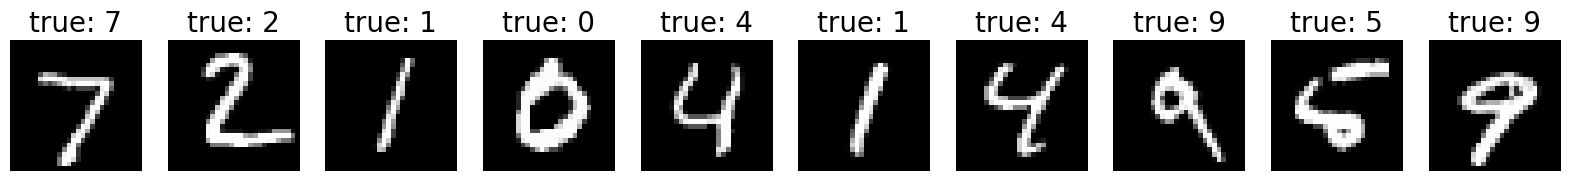

In [57]:
import matplotlib.pyplot as plt

num_imgs_to_visualize = 10

figure = plt.figure(figsize=(20, 20))

for i in range(num_imgs_to_visualize):
    # here we indexing the Dataset-object "as is" and gettig a tuple (img, label)
    img, label = test_data[i]

    figure.add_subplot(1, num_imgs_to_visualize, i + 1)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(f"true: {label}", fontsize=20)
    plt.axis("off")
plt.show()

### Подготовка данных для обучения с помощью DataLoader

`Dataset` возвращает по одной паре "объект — метка" за раз. При обучении моделей мы обычно хотим получать объекты в виде мини-батчей, перемешивая данные на каждой эпохе для уменьшения переобучения.

`DataLoader` — это объект, который позволяет нам получать такие мини-батчи. При инициализации он принимает в себя объект `Dataset` (или `Subset`), а также параметры `batch_size` (размер мини-батча) и `shuffle` (перемешивать ли данные в батчах каждую эпоху).

Другие параметры, а также значения по умолчанию можно посмотреть в документации PyTorch для класса `DataLoader` [🛠️[doc]](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader).

In [58]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(train_data, batch_size=8, shuffle=True)
val_dataloader = DataLoader(val_data, batch_size=8, shuffle=False)
test_dataloader = DataLoader(test_data, batch_size=8, shuffle=False)

Так как мы разделили данные на обучающие, валидационные и тестовые (`train_data`, `val_data` и `test_data`), то мы создаем также три независимых `DataLoader`-а. Один из них позволит нам получать батчи из обучающей выборки, второй — из валидационной, третий — из тестовой.

Обратите внимание на параметр `shuffle`! По умолчанию он имеет значение `False`. **Для обучения нейронной сети критически важно, чтобы во время обучения батчи обучающих данных перемешивались**. Именно таким образом мы вносим **стохастичность** в процесс градиентного спуска. Поэтому для `DataLoader`-a, который будет выдавать батчи для обучения, необходимо использовать `shuffle=True`.

В противоположность этому — `DataLoader`-ы для валидационных и тестовых данных. Эти данные данные служат для оценки качества работы модели, на них не происходит обучение и градиентный спуск. Поэтому установка здесь `shuffle=True` не имеет большого смысла.

#### Итерирование по `DataLoader`

Мы загрузили набор данных в `DataLoader`, и теперь можем проходиться по нему по мере необходимости. Каждая итерация в коде ниже будет возвращать мини-батч в виде кортежа тензоров `(samples, labels)`, содержащих `batch_size=8` объектов и меток соответственно.
Так как мы установили для `train_dataloader` параметр `shuffle=True`, когда мы пройдемся по всем батчам, данные перемешаются.

Images batch shape: torch.Size([8, 1, 28, 28]) : [batch_size, num_channels, H, W]
Labels batch shape: torch.Size([8])

The first sample in the batch:


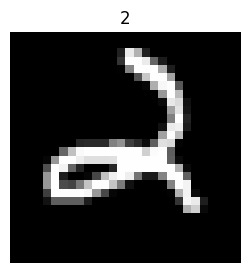

In [59]:
# Get one next batch
imgs, labels = next(iter(train_dataloader))

print(f"Images batch shape: {imgs.size()} : [batch_size, num_channels, H, W]")
print(f"Labels batch shape: {labels.size()}")

print("\nThe first sample in the batch:")
img = imgs[0].squeeze()
label = labels[0].item()

plt.figure(figsize=(3, 3))
plt.imshow(img, cmap="gray")
plt.title(label)
plt.axis("off")
plt.show()

#### Взвешенное формирование батчей для работы с дисбалансом

Еще одним атрибутом `DataLoader` является `sampler` [🛠️[doc]](https://pytorch.org/docs/stable/data.html#torch.utils.data.Sampler) — он отвечает за то, как объекты набираются в батчи. **По умолчанию** все объекты могут попадать в батчи **равновероятно**.

При работе с несбалансированными классами можно формировать батчи так, чтобы в каждом батче классы были примерно сбалансированы.

Это может улучшать сходимость даже в случае небольшого дисбаланса или его отсутствия, т. к. мы будем избегать шаги обучения нейросети, в которых она просто не увидела какой-то класс в силу случайных причин.

<center><img src="https://edunet.kea.su/repo/EduNet-content/dev-2.3/L05/out/batch_balancing.png" width="1000"></center>

При таком подходе требуется, чтобы объекты попадали в батчи **не равновероятно, а с определенными весами**. В PyTorch эту функциональность можно получить, используя класс `WeightedRandomSampler` [🛠️[doc]](https://pytorch.org/docs/stable/data.html#torch.utils.data.WeightedRandomSampler). Для его инициализации требуется рассчитать вес каждого класса.

Сумма весов не обязана быть равна единице, важно только соотношение между весами. Часто соотношение весов делают обратно пропорциональным количеству объектов в классах.



```python
_, classes_counts = torch.unique(y, return_counts=True)  # y — tensor of labels in train set
weights_for_classes = classes_counts.max() / classes_counts
```

В конструктор `WeightedRandomSampler` требуется подать два аргумента:

- список весов для **каждого** элемента в датасете;
- количество элементов (можно использовать не весь датасет).

Затем созданный `sampler` передается в конструктор `DataLoader`.

```python
from torch.utils.data import WeightedRandomSampler

weight_for_every_sample = []  # Every sample must have a weight
for label in y:
    weight_for_every_sample.append(weights_for_classes[label].item())

sampler = WeightedRandomSampler(torch.tensor(weight_for_every_sample), len(dataset))
dataloader = DataLoader(dataset, batch_size=batch_size, sampler=sampler)
```

Когда у `DataLoader` указывается `sampler`, последний принимает на себя функцию перемешивания, поэтому параметр `shuffle` **должен** быть не указан.

Также отметим, что подобную процедуру взвешенного формирования батчей следует производить только с обучающими данными, но не с валидационными и тестовыми. Мы хотим, чтобы модель при обучении поровну видела объекты всех классов, но оценивать качество нужно на данных с реальным распределением.

Стоит отметить, что нужно быть осторожным со взвешиванием объектов в батчах и **контролировать состав батчей**. Дело в том, что при существенном дисбалансе веса при объектах минорного класса могут оказываться на несколько порядков больше, чем при объектах мажорного класса. Данные веса преобразуются в вероятности для семплирования, и может случиться так, что вероятности при объектах мажорного класса станут численно неотличимы от нуля. Тем самым можно получить обратный эффект: батчи будут состоять исключительно из объектов минорного класса. В таком случае нужно намеренно ограничивать веса.

## Трансформации (Transforms)

Данные не всегда поступают в том формате, который требуется для работы моделей машинного обучения. Для того, чтобы производить преобразования с данными, чтобы они становились пригодными для обучения, в PyTorch реализован механизм трансформаций (transforms).

Наборы данных в torchvision имеют два параметра: `transform` — для применения трансформаций к входным данным, и `target_transform` — соответственно для преобразования меток.
Эти параметры принимают в себя вызываемые (callable) объекты, содержащие логику преобразований. Модуль `torchvision.transforms.v2` [🛠️[doc]](https://pytorch.org/vision/0.19/transforms.html#v2-api-reference-recommended) предоставляет ряд часто используемых трансформаций "из коробки".

Важно отметить, что есть версия `torchvision.transforms` (v1) [🛠️[doc]](https://pytorch.org/vision/0.19/transforms.html#v1-api-reference). Она тоже стабильна, подходит для большинства задач, кроме некоторых, например, сегментации (речь о ней пойдет в курсе позже). Однако она имеет ряд отличий от `torchvision.transforms.v2`, список которых представлен тут: [🛠️[doc]](https://pytorch.org/vision/0.19/transforms.html#v1-or-v2-which-one-should-i-use). Новая версия работает быстрее и имеет более широкую функциональность, поэтому далее по ходу курса мы будем использовать именно `torchvision.transforms.v2`.

Важно понимать, что трансформации, указанные в `transform` и `target_transform`, **применяются к данным налету**, то есть в момент обращения к этим данным через `Dataset` или `DataLoader`.

### ToImage

Для работы с изображениями в torchvision реализован класс `Image` [🛠️[doc]](https://pytorch.org/vision/main/generated/torchvision.tv_tensors.Image.html#torchvision.tv_tensors.Image), а также трансформация `v2.ToImage` [🛠️[doc]](https://pytorch.org/vision/main/generated/torchvision.transforms.v2.ToImage.html?highlight=toimage#torchvision.transforms.v2.ToImage), которая переводит в этот формат изображения, хранящиеся в форматах PIL Image (Python Image Library), `numpy.ndarray` или `torch.Tensor` (это наиболее распространенные форматы хранения изображений при их обработке нейронными сетями).

### ToDtype

После перевода изображений в формат `Image`, требуется привести данные к типу `torch.float32`. Для этого используется трансформация `v2.ToDtype` [🛠️[doc]](https://pytorch.org/vision/main/generated/torchvision.transforms.v2.ToDtype.html?highlight=todtype#torchvision.transforms.v2.ToDtype).

Параметры `v2.ToDtype` следующие:
* `dtype` (обязательный параметр) — тип, к которому требуется привести данные,
* `scale` (опциональный параметр, принимающий значения `True` или `False`) — определяет, требуется ли применить к данным масштабирование. **При указании `scale=True` значения интенсивности пикселей приводятся к масштабу $[0., 1.]$**.

### Compose

Для того, чтобы объединить несколько трансформаций в одну сущность, предусмотрен класс `v2.Compose` [🛠️[doc]](https://pytorch.org/vision/0.19/generated/torchvision.transforms.v2.Compose.html#torchvision.transforms.v2.Compose). Его единственный параметр — список объединяемых трансформаций. `v2.Compose` — это контейнер для трансформаций, которые будут применяться **последовательно**.

Выше при загрузке данных мы уже использовали упомянутые модули, указав в качестве трансформации следующую:

```python
transform = v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])
```

Здесь в `v2.Compose` объединены две трансформации:
* `v2.ToImage()` для перевода данных в формат `Image`,
* `v2.ToDtype(torch.float32, scale=True)` для приведения значений к типу `torch.float32` и масштабирования величин в диапазон $[0., 1.]$.

*В `torchvision.transforms` (v1) изображения приводятся к формату `torch.FloatTensor`. Для перевода данных в `torch.FloatTensor` с одновременным масштабированием в $[0., 1.]$ применяется трансформация `torchvision.transforms.ToTensor` [🛠️[doc]](https://pytorch.org/vision/main/generated/torchvision.transforms.ToTensor.html).*

### Normalize

Предположим, что помимо перевода данных в подходящий формат и масштабирования мы бы хотели произвести какие-то преобразования со входными данными. Скажем, произвести нормализацию: вычесть математическое ожидание и разделить на стандартное отклонение по выборке. Для проведения такой операции в `torchvision.transforms.v2` предусмотрена трансформация `Normalize` [🛠️[doc]](https://pytorch.org/vision/0.19/generated/torchvision.transforms.v2.Normalize.html#torchvision.transforms.v2.Normalize).

Два обязательных параметра в этой трансформации — это `mean` и `std`:
* `mean` — последовательность математических ожиданий по каждому каналу выборки изображений,
* `std` — последовательность стандартных отклонений по каждому каналу выборки изображений.

`Normalize` применяется только к данным, переведенным в `torch.Tensor`, поэтому в общем случае ее применяют после `ToImage` и `ToDtype`.

Давайте вычислим среднее и стандартное отклонение по обучающим данным. Для этого обратимся к `train_data.dataset.data` по индексам, которые попали в `Subset` `train_data`:

In [60]:
import torch

raw_train_data = train_data.dataset.data[train_data.indices]

print("Train part of data:")
print("Type: ", type(raw_train_data))
print("Size: ", raw_train_data.size())
print("Dtype:", raw_train_data.dtype)
print("Max:  ", torch.max(raw_train_data).item())
print("Min:  ", torch.min(raw_train_data).item())

Train part of data:
Type:  <class 'torch.Tensor'>
Size:  torch.Size([50000, 28, 28])
Dtype: torch.uint8
Max:   255
Min:   0


В `train_data.dataset.data` для MNIST данные хранятся как тензор целых чисел (`uint8`) c минимальным значением $0$ и максимальным значением $255$. Функции `torch.mean()` и `torch.std()` выдадут ошибку, если передать им тензор целых чисел. Поэтому изменим тип на вещественный, применив метод `.double()`.

In [61]:
mean = torch.mean(raw_train_data.double()).item()
std = torch.std(raw_train_data.double()).item()
print(f"mean = {mean:.2f}, std = {std:.2f}")

mean = 33.33, std = 78.58


Вспомним, что мы хотим применять `Normalize` к данным после масштабирования в диапазон $[0., 1.]$. Значит, матожидание и стандартное отклонение мы также должны разделить на максимальное значение, которое было до масштабирования — на $255$.

In [62]:
mean /= 255
std /= 255
print(f"Scaled mean = {mean:.2f}, std = {std:.2f}")

Scaled mean = 0.13, std = 0.31


После расчета статистик остается только объединить `ToImage`, `ToDtype` и `Normalize` в одну трансформацию с помощью `Compose`:

In [63]:
transform_with_normalize = v2.Compose(
    [v2.ToImage(), v2.ToDtype(torch.float32, scale=True), v2.Normalize([mean], [std])]
)

print(transform_with_normalize)

Compose(
      ToImage()
      ToDtype(scale=True)
      Normalize(mean=[0.13071035334133654], std=[0.30815512051891786], inplace=False)
)


Для применения измененной трансформации нужно подменить у обучающего и тестового датасетов ту трансформацию, которую мы указали при загрузке данных, на нашу новую — с нормализацией. Для этого посмотрим на атрибут `.transform` и изменим его.

**Внимание! Неочевидная особенность!**

Функция `random_split` возвращает объекты класса `Subset`, которые не имеют своих трансформаций, а используют трансформации, определенные в родительском объекте класса `Dataset`.

In [64]:
print("Old train and val transform:", train_data.dataset.transform)
print("Old test transform:", test_data.transform)

train_data.dataset.transform = transform_with_normalize
test_data.transform = transform_with_normalize

print("\nNew train and val transform:", train_data.dataset.transform)
print("New test transform:", test_data.transform)

Old train and val transform: Compose(
      ToImage()
      ToDtype(scale=True)
)
Old test transform: Compose(
      ToImage()
      ToDtype(scale=True)
)

New train and val transform: Compose(
      ToImage()
      ToDtype(scale=True)
      Normalize(mean=[0.13071035334133654], std=[0.30815512051891786], inplace=False)
)
New test transform: Compose(
      ToImage()
      ToDtype(scale=True)
      Normalize(mean=[0.13071035334133654], std=[0.30815512051891786], inplace=False)
)


Следует еще раз заметить, что при нормализации мы **вычисляем** оценки математического ожидания и стандартного отклонения `mean` и `std` **на обучающих данных**, а **применяем** вычисленные оценки **и на обучающих, и на валидационных, и на тестовых данных**.

Теперь при обращении к данным через `DataLoader` будет происходить следующее:

1. Объект `DataLoader` обращается к объекту `Dataset` за данными, чтобы сформировать батч.
2. `Dataset` считывает данные, которые хранятся на диске, в формате PIL Image, применяет к ним трансформации, указанные в его атрибуте `.transform` (в данном случае это последовательность `ToImage`, `ToDtype` и `Normalize`) и возвращает `DataLoader`-у преобразованные данные.
3. `DataLoader` формирует из полученных данных батч и возвращает его.

Обратите внимание, что на диске по-прежнему лежат просто изображения в своем специальном формате, и их довольно много. Но при этом в каждый момент времени мы не храним на диске все изображения как тензоры в сыром виде или в нормализованном. Нужные операции применяются к данным налету, только когда они нужны — при формировании батчей.

## Создание нейронной сети

Нейронные сети состоят из слоев, которые производят преобразования над данными. В PyTorch принято называть слои ***модулями*** (modules), и далее мы тоже будем использовать это название.

Пространство имен `torch.nn` [🛠️[doc]](https://pytorch.org/docs/stable/nn.html) предоставляет "строительные блоки", которые нужны для создания своей собственной нейронной сети. Каждый *модуль* в PyTorch является дочерним классом от `nn.Module` [🛠️[doc]](https://pytorch.org/docs/stable/generated/torch.nn.Module.html). Таким образом, нейронная сеть сама по себе будет являться *модулем*, состоящим из других *модулей* (слоев). Такая вложенная структура позволяет легко создавать сложные архитектуры и управлять ими.

Ниже мы рассмотрим пример создания нейронной сети для классификации изображений из набора данных MNIST.

### Выбор устройства (device) для обучения

Мы бы хотели иметь возможность обучать модель на аппаратном ускорителе, таком как GPU, если он доступен. Проверим, доступен ли нам ускоритель `torch.cuda` [🛠️[doc]](https://pytorch.org/docs/stable/notes/cuda.html), иначе продолжим вычисления на CPU.

In [65]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cuda device


### Описание класса модели

Мы определяем нейронную сеть, наследуясь от класса `nn.Module`, и инициализируем ее слои в методе `__init__`. Каждый класс-наследник `nn.Module` производит операции над входными данными в методе `forward`.

Напишем собственную нейронную сеть как класс `NeuralNetwork`. Ниже подробно рассмотрим все составляющие ее части.

In [66]:
from torch import nn


class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.layers_stack = nn.Sequential(
            nn.Linear(28 * 28, 512),
            nn.ReLU(),
            nn.Linear(512, 128),
            nn.ReLU(),
            nn.Linear(128, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.layers_stack(x)
        return logits

Создадим экземпляр класса `NeuralNetwork`, переместим его на `device` с помощью метода `to` и выведем информацию о структуре модели:

In [67]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (layers_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=10, bias=True)
  )
)


Чтобы использовать модель, мы передаем ей входные данные. Это приводит в действие метод `forward`, а также определенные фоновые операции. Не следует вызывать `model.forward` напрямую!

Вызов модели с входными данными возвращает тензор с двумя размерностями: нулевая размерность `dim=0` соответствует  количеству переданных примеров, а первая `dim=1` — десяти выходным "сырым" предсказаниям (логитам) для каждого класса.

Мы можем получить предсказание модели в виде вероятностей, пропустив логиты через экземпляр модуля `nn.Softmax`, вызвав его вычисление вдоль первой размерности `dim=1`.

In [68]:
# Random input of 3 images
sample_batch = torch.rand(
    3, 1, 28, 28, device=device
)  # [batch_size, num_channels, H, W]

# Model output
logits = model(sample_batch)

# Predicted probabilities
pred_probab = nn.Softmax(dim=1)(logits)

# Predicted classes
y_pred = pred_probab.argmax(dim=1)

print(f"Input size:       {sample_batch.size()} : [batch_size, num_channels, H, W]")
print(f"Output size:      {logits.size()}        : [batch_size, num_classes]")
print(
    f"Predicted class:  {y_pred}          : [class for sample 1, class for sample 2, class for sample 3]"
)

Input size:       torch.Size([3, 1, 28, 28]) : [batch_size, num_channels, H, W]
Output size:      torch.Size([3, 10])        : [batch_size, num_classes]
Predicted class:  tensor([3, 3, 3], device='cuda:0')          : [class for sample 1, class for sample 2, class for sample 3]


### Слои модели

Давайте заглянем "под капот" нашей модели `NeuralNetwork`. Для иллюстрации возьмем мини-батч из трех одноканальных изображений $28×28$ и посмотрим, что с ним происходит, когда мы пропускаем его через сеть.

In [69]:
sample_batch = torch.rand(3, 1, 28, 28)
print(f"Input size: {sample_batch.size()}")

Input size: torch.Size([3, 1, 28, 28])


#### Слой `nn.Flatten`

Мы используем слой `nn.Flatten` [🛠️[doc]](https://pytorch.org/docs/stable/generated/torch.nn.Flatten.html) для преобразования каждого изображения $1×28×28$ пикселей в непрерывный массив из $784$ значений (размер батча (на позиции `dim=0`) сохраняется).

In [70]:
flatten = nn.Flatten()
flat_image = flatten(sample_batch)
print(f"Size after Flatten: {flat_image.size()}")

Size after Flatten: torch.Size([3, 784])


#### Слой `nn.Linear`

Линейный слой `nn.Linear` [🛠️[doc]](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html) — это модуль, который производит линейное преобразование входных данных с помощью хранящихся в нем весов и смещений.

Обязательными параметрами при объявлении этого слоя являются:
* `in_features` — количество входных признаков,
*`out_features` — количество выходных признаков.

Фактически этот модуль добавляет в модель один полносвязный слой нейронов *без активаций*. Слой состоит из `out_features` нейронов, каждый из которых имеет `in_features` входов.

В примере ниже мы объявляем слой из $512$ нейронов, каждый из которых получает "вытянутое" изображение из $784$ пикселей.

In [71]:
layer1 = nn.Linear(in_features=784, out_features=512)
hidden1 = layer1(flat_image)
print(f"Size after Linear:  {hidden1.size()}")

Size after Linear:  torch.Size([3, 512])


Линейный слой, в отличие от слоя `nn.Flatten`, имеет обучаемые параметры — веса и смещения. Они хранятся как объекты специального класса `torch.nn.parameter.Parameter` и содержат в себе тензоры собственно с величинами параметров. Получить доступ к ним можно, обратившись к атрибутам слоя `.weight` и `.bias` соответственно.

In [72]:
print(f"Size of linear layer weights: {layer1.weight.size()}")
print(f"Type of linear layer weights: {type(layer1.weight)}")

print(f"\nSize of linear layer biases: {layer1.bias.size()}")
print(f"Type of linear layer biases: {type(layer1.bias)}")

Size of linear layer weights: torch.Size([512, 784])
Type of linear layer weights: <class 'torch.nn.parameter.Parameter'>

Size of linear layer biases: torch.Size([512])
Type of linear layer biases: <class 'torch.nn.parameter.Parameter'>


#### Слой `nn.ReLU`

Нелинейные активации — это то, что позволяет модели учить сложные взаимосвязи между входом и выходом. Они применяются после линейных преобразований, чтобы ввести *нелинейность*, помогая нейронным сетям изучать самые разные закономерности.

В данной модели мы используем `nn.ReLU` [🛠️[doc]](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html) между линейными слоями, но существуют и реализации [других функций активации 🛠️[doc]](https://pytorch.org/docs/stable/nn.html#non-linear-activations-weighted-sum-nonlinearity).

In [73]:
activations1 = nn.ReLU()(hidden1)

print(f"Before ReLU:  {hidden1}")
print(f"After ReLU:  {activations1}")
print(f"\n Size after ReLU:  {activations1.size()}")

Before ReLU:  tensor([[ 0.0749, -0.2586,  0.5188,  ...,  0.0911, -0.4177, -0.2410],
        [ 0.1695, -0.0433,  0.4449,  ..., -0.0097, -0.2726, -0.4916],
        [ 0.1697,  0.2568,  0.4956,  ...,  0.2443, -0.2647, -0.1359]],
       grad_fn=<AddmmBackward0>)
After ReLU:  tensor([[0.0749, 0.0000, 0.5188,  ..., 0.0911, 0.0000, 0.0000],
        [0.1695, 0.0000, 0.4449,  ..., 0.0000, 0.0000, 0.0000],
        [0.1697, 0.2568, 0.4956,  ..., 0.2443, 0.0000, 0.0000]],
       grad_fn=<ReluBackward0>)

 Size after ReLU:  torch.Size([3, 512])


#### Объединение модулей в `nn.Sequential`

`nn.Sequential` [🛠️[doc]](https://pytorch.org/docs/stable/generated/torch.nn.Sequential.html) — это упорядоченный контейнер для модулей. Данные проходят через все модули в том же порядке, в котором они определены в `nn.Sequential`. Можно использовать такой контейнер для того, чтобы быстро собрать простую нейронную сеть, как `seq_modules` в примере ниже.

In [74]:
seq_modules = nn.Sequential(flatten, layer1, nn.ReLU(), nn.Linear(512, 10))

sample_batch = torch.rand(3, 1, 28, 28)
logits = seq_modules(sample_batch)

print(f"Output size: {logits.size()}")

Output size: torch.Size([3, 10])


#### Слой `nn.Softmax`

Последний линейный слой нейронной сети возвращает *логиты* — "сырые" значения из диапазона $[-∞; +∞]$, которые могут быть пропущены через модуль `nn.Softmax` [🛠️[doc]](https://pytorch.org/docs/stable/generated/torch.nn.Softmax.html). Пропущенные через Softmax величины могут восприниматься как вероятности, с которыми модель относит данный объект к тому или иному классу. Параметр `dim` определяет размерность, вдоль которой величины должны суммироваться к $1$.

In [75]:
softmax = nn.Softmax(dim=1)

pred_probab = softmax(logits)

print(f"Size after Softmax: {pred_probab.size()}")

Size after Softmax: torch.Size([3, 10])


### Параметры модели

Множество слоев в нейронных сетях имеют *обучаемые параметры*, т. е. имеют ассоциированные с ними веса и смещения, которые оптимизируются во время обучения.

Наследование от `nn.Module` автоматически отслеживает все слои, определенные внутри вашего класса модели, и делает все их параметры доступными с помощью методов `model.parameters()` или `model.named_parameters()`.

В примере ниже мы проходимся по всем параметрам модели и для каждого тензора параметров выводим его размер.

In [76]:
print(f"Model structure: {model}\n")

for name, param in model.named_parameters():
    print(
        f"Layer: {name:23}  Requires grad: {param.requires_grad}  Size: {param.size()}"
    )

Model structure: NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (layers_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=10, bias=True)
  )
)

Layer: layers_stack.0.weight    Requires grad: True  Size: torch.Size([512, 784])
Layer: layers_stack.0.bias      Requires grad: True  Size: torch.Size([512])
Layer: layers_stack.2.weight    Requires grad: True  Size: torch.Size([128, 512])
Layer: layers_stack.2.bias      Requires grad: True  Size: torch.Size([128])
Layer: layers_stack.4.weight    Requires grad: True  Size: torch.Size([10, 128])
Layer: layers_stack.4.bias      Requires grad: True  Size: torch.Size([10])


## Обучение нейронной сети

Теперь, когда мы подготовили данные и создали модель, мы можем приступить к обучению.

Обучение модели — итеративный процесс оптимизации параметров модели на обучающих данных. На каждой итерции модель получает входные данные, дает предсказание на выходе, вычисляет значение функции потерь (loss), вычисляет производные функции потерь по параметрам и подстраивает параметры, используя градиентный спуск.

### Гиперпараметры

Гиперпараметры — это задаваемые разработчиком параметры, которые позволяют управлять процессом обучения. Различные значения гиперпараметров могут влиять на обучение модели и скорость сходимости. Подробнее про подбор гиперпараметров:
* [[doc] 🛠️ Hyperparameter tuning with Ray Tune](https://pytorch.org/tutorials/beginner/hyperparameter_tuning_tutorial.html)

Мы определим следующие гиперпараметры процедуры обучения:
* **количество эпох** (`num_epochs`) — количество итераций обучения по всему набору данных;
* **размер батча** (`batch_size`) — количество образцов, передаваемых в сеть для обновления параметров;
* **скорость обучения** (`learning_rate`) — коэффициент, определяющий, насколько сильно нужно обновлять параметры модели на каждом батче. Малые значения приводят к долгому обучению, в то время как большие значения могут приводить к непредсказуемому поведению во время обучения.


In [77]:
num_epochs = 10
batch_size = 64
learning_rate = 1e-3

Выше для демонстрации мы указывали размер батча в `DataLoader`-ах равным восьми. Для установки нового значения придется переопределить `DataLoader`-ы.

In [78]:
train_dataloader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(val_data, batch_size=batch_size, shuffle=False)
test_dataloader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

### Оптимизация параметров (обучение сети)

Задав гиперпараметры, мы можем приступить к обучению модели. Каждая итерация цикла оптимизации называется **эпохой**.

Каждая эпоха состоит из двух частей:
* **цикл обучения (Train Loop)** — проход по обучающему набору данных и оптимизация параметров;
* **цикл валидации (Validation Loop)** — проход по валидационному набору данных и контроль того, что качество работы сети улучшается.

Кратко ознакомимся с некоторыми понятиями, используемыми в цикле оптимизации.

#### Функция потерь (Loss function)

Так как мы решаем задачу классификации со сбалансированным датасетом, выберем `nn.CrossEntropyLoss` [🛠️[doc]](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html#torch.nn.CrossEntropyLoss) в качестве функции потерь.



In [79]:
# Initialize the loss function
criterion = nn.CrossEntropyLoss()

#### Оптимизатор (Optimizer)

Оптимизация — это процесс подстройки параметров модели для уменьшения ошибки на каждом шаге обучения. От **алгоритма оптимизации** зависит то, как этот процесс будет выполняться. Здесь мы будем использовать стохастический градиентный спуск (Stochastic Gradient Descent, SGD). Однако в PyTorch реализовано еще [множество других алгоритмов оптимизации 🛠️[doc]](https://pytorch.org/docs/stable/optim.html#algorithms), таких как Adam и RMSProp, и они могут работать лучше или хуже для разных видов моделей и данных.

Вся логика оптимизации заключена в объекте `optimizer`. Мы инициализируем оптимизатор, передавая ему параметры модели, которые требуется обучать (`model.parameters()`), а также гиперпараметр скорости обучения (`learning_rate`).

In [80]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

Внутри цикла обучения оптимизация производится за три шага:
1. Вызов `optimizer.zero_grad()`, чтобы сбросить градиенты параметров модели. По умолчанию градиенты суммируются, и во избежание повторного вычисления их необходимо явно обнулять на каждой итерации.
2. Обратное распространение ошибки предсказания с помощью вызова `loss.backward()`. PyTorch вычислит градиенты функции потерь относительно каждого обучаемого параметра.
3. Когда у нас есть градиенты, мы вызываем `optimizer.step()`, чтобы подстроить обучаемые параметры с учетом градиентов, посчитанных при обратном распространении, согласно алгоритму оптимизации.


### Реализация обучения

Мы определим две функции:
* `train_loop`, которая производит цикл обучения,
* `val_loop`, которая оценивает качество модели на валидационных данных.

In [81]:
def train_loop(dataloader, model, criterion, optimizer):
    num_batches = len(dataloader)

    train_loss = 0

    for imgs, labels in dataloader:
        # Compute prediction and loss
        pred = model(imgs.to(device))
        loss = criterion(pred, labels.to(device))

        # Optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += loss.detach().item()

    train_loss /= num_batches
    print(f"Train loss: {train_loss:>8f}")

    return train_loss


def val_loop(dataloader, model, criterion):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)

    val_loss, correct = 0, 0

    with torch.no_grad():
        for imgs, labels in dataloader:
            # Compute prediction and loss
            pred = model(imgs.to(device))
            loss = criterion(pred, labels.to(device))

            val_loss += loss.item()
            correct += (pred.argmax(dim=1) == labels.to(device)).sum().item()

    val_loss /= num_batches
    accuracy = correct / size
    print(f"Val loss: {val_loss:>8f}, val accuracy: {(100*accuracy):>0.1f}% \n")

    return val_loss

Выше мы объявили гиперпараметры и инициализировали функцию потерь `criterion` и оптимизатор `optimizer`. Теперь мы запускаем цикл оптимизации на $10$ эпох, и в каждой итерации мы вызываем функцию для выполнения цикла обучения `train_loop`, а затем функцию для промежуточной оценки качества `val_loop`. Также на каждой эпохе будем сохранять текущее значение функции потерь на обучающих и валидационных данных для построения графика обучения.

In [82]:
# For plotting
loss_history = {"train": [], "val": []}

for i in range(num_epochs):
    print(f"Epoch {i+1}")
    train_loss = train_loop(train_dataloader, model, criterion, optimizer)
    val_loss = val_loop(val_dataloader, model, criterion)

    loss_history["train"].append(train_loss)
    loss_history["val"].append(val_loss)
print("Done!")

Epoch 1
Train loss: 2.133634
Val loss: 1.919166, val accuracy: 68.1% 

Epoch 2
Train loss: 1.596912
Val loss: 1.264241, val accuracy: 76.7% 

Epoch 3
Train loss: 1.009547
Val loss: 0.821350, val accuracy: 83.0% 

Epoch 4
Train loss: 0.706963
Val loss: 0.626575, val accuracy: 85.5% 

Epoch 5
Train loss: 0.566418
Val loss: 0.526903, val accuracy: 87.0% 

Epoch 6
Train loss: 0.488392
Val loss: 0.468376, val accuracy: 87.7% 

Epoch 7
Train loss: 0.440035
Val loss: 0.430031, val accuracy: 88.3% 

Epoch 8
Train loss: 0.407030
Val loss: 0.403904, val accuracy: 88.8% 

Epoch 9
Train loss: 0.383234
Val loss: 0.383677, val accuracy: 89.1% 

Epoch 10
Train loss: 0.365264
Val loss: 0.368745, val accuracy: 89.4% 

Done!


Построим график функции потерь на обучающих и на валидационных данных по эпохам:

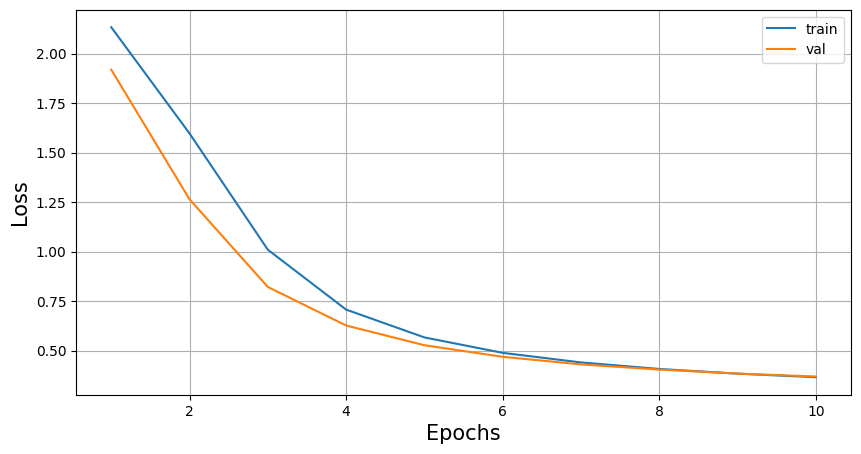

In [83]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), loss_history["train"], label="train")
plt.plot(range(1, num_epochs + 1), loss_history["val"], label="val")
plt.xlabel("Epochs", fontsize=15)
plt.ylabel("Loss", fontsize=15)
plt.legend()
plt.grid()
plt.show()

### Сохранение и загрузка весов модели

Обычно обучение модели является достаточно затратным процессом с точки зрения вычислительных ресурсов. Поэтому однажды обученную сеть разумно будет сохранить для последующего использования. Рассмотрим варианты, как это можно сделать в PyTorch.

Модели PyTorch хранят обучаемые параметры во внутреннем словаре состояния, который называется `state_dict`. Их можно сохранить с помощью метода `torch.save`.


In [84]:
torch.save(model.state_dict(), "model_weights.pth")

Для того, чтобы загрузить веса модели, сперва необходимо создать экземпляр такой модели, а затем загрузить параметры с помощью метода `load_state_dict()`.

In [85]:
model = NeuralNetwork()
model.load_state_dict(torch.load("model_weights.pth", weights_only=True))
model.to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (layers_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=10, bias=True)
  )
)


Данный способ сохранения модели подходит только для случая, когда в дальнейшем не предполагается продолжать обучать модель. Для продолжения обучения также необходимо как минимум сохранить состояние оптимизатора.

[[doc] 🛠️ О более общем сохранении состояний модели, оптимизатора и других объектов](https://pytorch.org/tutorials/beginner/saving_loading_models.html#saving-loading-a-general-checkpoint-for-inference-and-or-resuming-training)

Сохранение в общем случае может выглядеть так:

```python
torch.save({
            "model_state_dict": model.state_dict(),
            "optimizer_state_dict": optimizer.state_dict(),
            "loss_history": loss_history,
            ...
            }, PATH)
```



###  Предсказания обученной модели

Поэтапно пропустим тестовые изображения через модель и визуализируем результат:

In [86]:
# Get batch
imgs, labels = next(iter(test_dataloader))
print("imgs shape: ", imgs.shape)

imgs shape:  torch.Size([64, 1, 28, 28])


In [87]:
# Get output
pred = model(imgs.to(device))
print("pred shape: ", pred.shape)

pred shape:  torch.Size([64, 10])


In [88]:
import numpy as np

pred = pred[:10].detach()
print("Prediction(1 sample):\n", pred[0])

digits = np.argmax(pred.cpu().numpy(), axis=1)
print("Predicted class: ", digits[0])

Prediction(1 sample):
 tensor([-0.8068, -3.0109, -1.2772,  1.5163, -1.6708, -0.4221, -4.5950,  8.2721,
        -0.7851,  2.9490], device='cuda:0')
Predicted class:  7


In [89]:
# Remove axis
imgs = torch.squeeze(imgs)
print("imgs shape (after squeeze): ", imgs.shape)

# Take 10 first images
imgs = imgs[:10]
print("imgs shape: ", imgs.shape)

imgs shape (after squeeze):  torch.Size([64, 28, 28])
imgs shape:  torch.Size([10, 28, 28])


Визуализируем изображения, подпишем предсказанное и истинное значения:

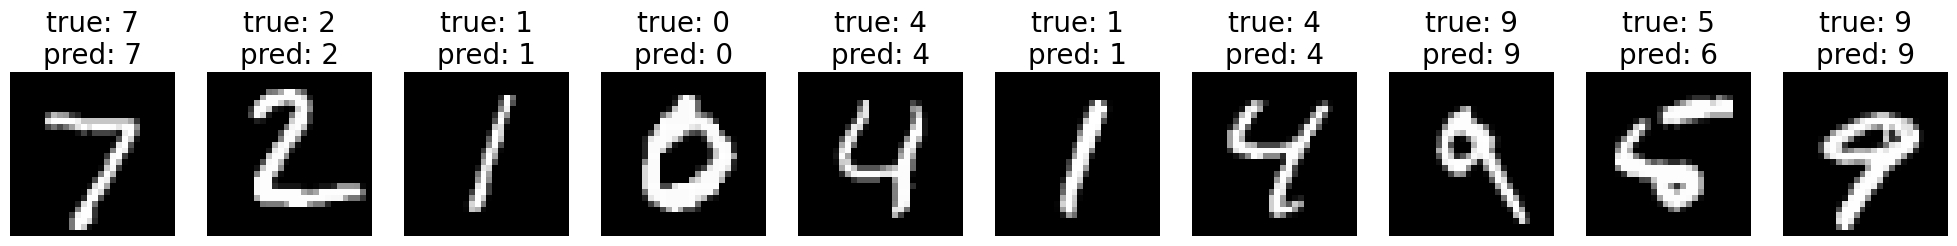

In [90]:
plt.figure(figsize=(25.0, 25.0))
for i in range(10):
    img = imgs[i]

    plt.subplot(1, 10, i + 1)
    plt.title(
        f"true: {labels[i].numpy()}\npred: {digits[i]}", fontsize=20
    )  # predicted and real values
    plt.axis("off")
    plt.imshow(img.numpy(), cmap="gray")

<font size=6>Литература</font>

<font size=5>Многослойные нейронные сети:</font>

* [[demo] 🎮 Интерактивный тренажер от TensorFlow ](http://playground.tensorflow.org/#activation=linear&batchSize=10&dataset=xor&regDataset=reg-plane&learningRate=0.1&regularizationRate=0&noise=0&networkShape=&seed=0.62952&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)
* [[wiki] 📚 Теорема Цыбенко](https://ru.wikipedia.org/wiki/Теорема_Цыбенко)
* [[book] 📚 Neural Networks and Deep Learning: визуальное доказательство теоремы об универсальной аппроксимации](http://neuralnetworksanddeeplearning.com/chap4.html)

<font size=5>Обучение нейронной сети:</font>

* [[blog] ✏️ ML: Вычислительный граф](https://qudata.com/ml/ru/ML_Comp_Graph.html)
* [[blog] ✏️ Обзор функций потерь в PyTorch с примером написания своей собственной функции (custom loss function)](https://neptune.ai/blog/pytorch-loss-functions)
* [[colab] 🥨 Подробное рассмотрение Focal Loss с примерами](https://colab.research.google.com/drive/1rM7zRySu8WulXbFiXzxBGVzILxvQ6K4A)
* [[arxiv] 🎓 Focal Loss for Dense Object Detection (Lin et al., 2017)](https://arxiv.org/abs/1708.02002)
* [[blog] ✏️ Объяснение Negative Log Likelihood Loss](https://ljvmiranda921.github.io/notebook/2017/08/13/softmax-and-the-negative-log-likelihood/)
* [[blog] ✏️ О соотношении Cross-Entropy Loss и Negative Log Likelihood Loss](https://jamesmccaffrey.wordpress.com/2020/06/11/pytorch-crossentropyloss-vs-nllloss-cross-entropy-loss-vs-negative-log-likelihood-loss/)
* [[blog] ✏️ How Activation Functions Work in Deep Learning](https://www.kdnuggets.com/2022/06/activation-functions-work-deep-learning.html)

<font size=5>Углубление в PyTorch. Пример нейронной сети на MNIST:</font>
* [[doc] 🛠️ PyTorch: Learn the basics tutorial](https://pytorch.org/tutorials/beginner/basics/intro.html)
* [[video] 📺 Плей-лист с объяснением базовых принципов нейронных сетей от 3Blue1Brown](https://youtube.com/playlist?list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi&si=O3gq6RoIxoNS6iJf) [[озвучка на русском](https://youtube.com/playlist?list=PLZjXXN70PH5itkSPe6LTS-yPyl5soOovc&si=ElKVi98Ui4m2nJKq)]
* [[doc] 🛠️ PyTorch: Сохранение состояний модели, оптимизатора и других объектов](https://pytorch.org/tutorials/beginner/saving_loading_models.html#saving-loading-a-general-checkpoint-for-inference-and-or-resuming-training)

<font size=5>Дополнительно:</font>
* [[wiki] 📚 Теорема об универсальной аппроксимации](https://en.wikipedia.org/wiki/Universal_approximation_theorem)
* [[book] 📚 Deep Learning](https://www.deeplearningbook.org/)
 * [[book] 📚 Part 2, Chapter 6: Deep Feedforward Networks](https://www.deeplearningbook.org/contents/mlp.html)
* [[demo] 🎮 Интерактивное и визуальное объяснение работы многослойных нейронных сетей](https://mlu-explain.github.io/neural-networks/)
* [[demo] 🎮 Интерактивная визуализация ландшафтов функций потерь в нейронных сетях](https://losslandscape.com/explorer)
* [[blog] ✏️ The 7 Most Common Machine Learning Loss Functions](https://builtin.com/machine-learning/common-loss-functions)
* [[blog] ✏️ Understanding Categorical Cross-Entropy Loss, Binary Cross-Entropy Loss, Softmax Loss, Logistic Loss, Focal Loss and all those confusing names](https://gombru.github.io/2018/05/23/cross_entropy_loss/)
* Курс А. Г. Дьяконова "Глубокое обучение". Лекции по PyTorch:
 * [[video] 📺 часть 1](https://www.youtube.com/watch?v=tDJnwc8Hioc)
 * [[video] 📺 часть 2](https://www.youtube.com/watch?v=c3y--ydWku0)